# Flight Price Prediction

### Import Libraries

In [1]:
# Scientific computing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#datetime package
import datetime as dt
import time

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_excel('C:/Users/Dazzle/Desktop/DataTrained/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Dataset is having numeric,date and categorical columns.

### Project Description

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here dataset is having the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

FEATURES:
Airline: The name of the airline.
Date_of_Journey: The date of the journey
Source: The source from which the service begins.
Destination: The destination where the service ends.
Route: The route taken by the flight to reach the destination.
Dep_Time: The time when the journey starts from the source.
Arrival_Time: Time of arrival at the destination.
Duration: Total duration of the flight.
Total_Stops: Total stops between the source and destination.
Additional_Info: Additional information about the flight

Price: The price of the ticket, is the target columns having numeric values, hence this is a regression problem.

In [3]:
#Checking the dataset shape
df.shape

(10683, 11)

Dataset is having 10683 rows and 11 columns (10 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Columns names are displayed where 'Price' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Here, we can see independent columns are of type object and target column is of integer type i.e. both categorical and numeric columns are there in the dataset.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. We can see there are null values in the dataset. Date_of_Journey,Dep_Time & Arrival_Time are of object type we can convert this to relevant format.

### Data Preprocessing

In [7]:
# Checking which all column values are relevant for model training
for i in df.columns :
    print(i,' : ', df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  12
Value counts  :  Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------
Date_of_Journey  :  object
Unique values :  44
Value counts  :  18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6

Data types of few columns need to be changed and feature engineering is required here to add separate columns based on values in Date_of_Journey, Route, Dep_Time, Arrival_Time, Duration, Total_Stops. 'Additional_Info' has 2 different values with 'No info' and 'No Info' which needs to be merged. Target column 'Price' has numeric values.

In [8]:
# Checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We have nulls in columns 'Route' & 'Total_Stops'. We will treat it later.

In [9]:
# Checking NaN values in dataset
df.loc[(df['Route'].isna()) & (df['Total_Stops'].isna())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


We can see in above row columns 'Route' and 'Total_Stops' have null values.

In [10]:
# Dropping null
df.dropna(axis=0,inplace=True)
df.isnull().sum().any()

False

No nulls in the dataset for now.

### Feature Engineering

In [11]:
# Converting the datetime columns to relevant datatype
for i in ['Date_of_Journey','Dep_Time','Arrival_Time'] :
    df[i]=pd.to_datetime(df[i])
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
# Treating column Date_of_Journey
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month
df['Year_of_Journey']=df['Date_of_Journey'].dt.year
df.drop('Date_of_Journey',axis=1,inplace=True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Year_of_Journey'],
      dtype='object')

In [13]:
# Checking for the total stops to confirm what should be the maximum number of cities in the longest Route
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route.

In [14]:
# Treating column Route
df['Route1']=df.Route.str.split('→')

# Creating new columns by splitting Route column
df['City1']=df.Route1.str[0]
df['City2']=df.Route1.str[1]
df['City3']=df.Route1.str[2]
df['City4']=df.Route1.str[3]
df['City5']=df.Route1.str[4]
df['City6']=df.Route1.str[5]

# Dropping Route & Route1 columns
df.drop(['Route'],axis=1,inplace=True)
df.drop(['Route1'],axis=1,inplace=True)

# Checking the dataset
df.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,City2,City3,City4,City5,City6
0,IndiGo,Banglore,New Delhi,2021-12-31 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2021-12-31 05:50:00,2021-12-31 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,2021-12-31 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,DEL,LKO,BOM,COK,NaN,NaN


In [15]:
# Treating column Dep_Time
df['Dep_Time_Day']=df['Dep_Time'].dt.day
df['Dep_Time_Month']=df['Dep_Time'].dt.month
df['Dep_Time_Year']=df['Dep_Time'].dt.year
df['Dep_Time_Hour']=df['Dep_Time'].dt.hour
df['Dep_Time_Minute']=df['Dep_Time'].dt.minute
df['Dep_Time_Second']=df['Dep_Time'].dt.second

# Dropping Dep_Time column
df.drop('Dep_Time',axis=1,inplace=True)

# Checking dataset
df.head(3)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,...,City3,City4,City5,City6,Dep_Time_Day,Dep_Time_Month,Dep_Time_Year,Dep_Time_Hour,Dep_Time_Minute,Dep_Time_Second
0,IndiGo,Banglore,New Delhi,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,...,NaN,NaN,NaN,NaN,31,12,2021,22,20,0
1,Air India,Kolkata,Banglore,2021-12-31 13:15:00,7h 25m,2 stops,No info,7662,5,1,...,BBI,BLR,NaN,NaN,31,12,2021,5,50,0
2,Jet Airways,Delhi,Cochin,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,...,BOM,COK,NaN,NaN,31,12,2021,9,25,0


In [16]:
# Treating column Arrival_Time
df['Arrival_Day']=df['Arrival_Time'].dt.day
df['Arrival_Month']=df['Arrival_Time'].dt.month
df['Arrival_Year']=df['Arrival_Time'].dt.year

df['Arrival_Time_Hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time_Minute']=df['Arrival_Time'].dt.minute
df['Arrival_Time_Second']=df['Arrival_Time'].dt.second

# Dropping Dep_Time column
df.drop('Arrival_Time',axis=1,inplace=True)

# Checking dataset
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,...,Dep_Time_Year,Dep_Time_Hour,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,...,2021,22,20,0,22,3,2021,1,10,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,5,1,2019,...,2021,5,50,0,31,12,2021,13,15,0
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,6,9,2019,...,2021,9,25,0,10,6,2021,4,25,0


In [17]:
# Treating column Duration
df['Duration1']=df.Duration.str.split(' ')

# Creating columns from Duration
df['Duration_hour']=df.Duration1.str[0]
df['Duration_hour']=df.Duration_hour.str.split('h')
df['Duration_hour']=df.Duration_hour.str[0]

df['Duration_minute']=df.Duration1.str[1]
df['Duration_minute']=df.Duration_minute.str.split('m')
df['Duration_minute']=df.Duration_minute.str[0]

# Dropping the Duration and Duration1 columns
df.drop(['Duration','Duration1'],axis=1,inplace=True)

# Checking the dataset
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,...,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,BLR,...,20,0,22,3,2021,1,10,0,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,2019,CCU,...,50,0,31,12,2021,13,15,0,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,2019,DEL,...,25,0,10,6,2021,4,25,0,19,NaN


In [18]:
# Treating column Total_Stops
df['Total_Stops']=df.Total_Stops.str.split(' ')

# Updateing column from Total_Stops
df['Total_Stops']=df.Total_Stops.str[0]

# Replacing non-stop value in column Total_Stops
df['Total_Stops'].replace('non-stop','0',inplace=True)

# Checking the dataset
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,...,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,BLR,...,20,0,22,3,2021,1,10,0,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,5,1,2019,CCU,...,50,0,31,12,2021,13,15,0,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,2019,DEL,...,25,0,10,6,2021,4,25,0,19,NaN


In [19]:
# Treating column Additional_Info by merging values of 'No Info' & 'No info'
df['Additional_Info'].replace('No Info','No info',inplace=True)
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [20]:
# Checking dataset shape
df.shape

(10682, 29)

### Data Wrangling

In [21]:
# Checking column values after doing feature engineering
for i in df.columns :
    print(i,' : ', df[i].dtypes)
    print('Unique values : ',df[i].nunique())
    print('Value counts  : ',df[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  12
Value counts  :  Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------
Source  :  object
Unique values :  5
Value counts  :  Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------
Destination  :  object
Unique values :  6
Value counts  :  Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-

Total_Stops, Duration_hour, Duration_minute should be of integer type. 

In column 'Duration_hour', there is 1 value as '5m' which needs to be treated.

'Year_of_Journey' has only 1 unique value (2019) for all records. 'City6' has just 1 unique value (DEL) with count as 1. 'Dep_Time_Day' has only 1 unique value (30) with count 10683. 'Dep_Time_Month' has only 1 unique value (12) with count 10683. 'Dep_Time_Year' has only 1 unique value (2021) with count 10683. 'Dep_Time_Second' has only 1 unique value (0) with count 10683. 'Arrival_Time_Year' has only 1 unique value (2021) with count 10683. 'Arrival_Time_Second' has only 1 unique value (0) with count 10683.

'City2','City3','City4' is having few values multiple times, need to check this.

In [22]:
# Dropping irrelevant columns
df.drop(['Year_of_Journey','City6','Dep_Time_Day','Dep_Time_Month','Dep_Time_Year','Dep_Time_Second','Arrival_Year','Arrival_Time_Second'],axis=1,inplace=True)
df.shape

(10682, 21)

Dropped not required columns based on data values in it.

In [23]:
# Checking column Duration_hour for wrong value
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,City1,City2,...,City4,City5,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
6474,Air India,Mumbai,Hyderabad,2,No info,17327,3,6,BOM,GOI,...,HYD,NaN,16,50,31,12,16,55,5m,NaN


We can see that the record is having 2 stops which can never be covered in 5 minutes hence this record is having irrevant details.

In [24]:
# Dropping the above record
df.drop(df[df['Duration_hour']=='5m'].index,inplace=True)

In [25]:
# Checking nulls
df.isnull().sum()

Airline                    0
Source                     0
Destination                0
Total_Stops                0
Additional_Info            0
Price                      0
Day_of_Journey             0
Month_of_Journey           0
City1                      0
City2                      0
City3                   3491
City4                   9116
City5                  10635
Dep_Time_Hour              0
Dep_Time_Minute            0
Arrival_Day                0
Arrival_Month              0
Arrival_Time_Hour          0
Arrival_Time_Minute        0
Duration_hour              0
Duration_minute         1031
dtype: int64

'City5' is having nulls near to total rows hence these columns shouls be dropped.

In [26]:
df.drop(['City5'],axis=1,inplace=True)
df.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Additional_Info           0
Price                     0
Day_of_Journey            0
Month_of_Journey          0
City1                     0
City2                     0
City3                  3491
City4                  9116
Dep_Time_Hour             0
Dep_Time_Minute           0
Arrival_Day               0
Arrival_Month             0
Arrival_Time_Hour         0
Arrival_Time_Minute       0
Duration_hour             0
Duration_minute        1031
dtype: int64

In [27]:
# Checking NaN values in Duration_minute
df.loc[(df['Duration_minute'].isna())].head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
2,Jet Airways,Delhi,Cochin,2,No info,13882,6,9,DEL,LKO,BOM,COK,9,25,10,6,4,25,19,NaN
18,Air India,Delhi,Cochin,2,No info,13381,6,12,DEL,CCU,BOM,COK,20,15,13,6,19,15,23,NaN
33,Jet Airways,Delhi,Cochin,2,In-flight meal not included,10919,15,6,DEL,NAG,BOM,COK,14,35,16,6,12,35,22,NaN
44,Multiple carriers,Delhi,Cochin,1,No info,13062,21,3,DEL,BOM,COK,NaN,9,0,31,12,21,0,12,NaN
53,IndiGo,Banglore,Delhi,0,No info,3943,18,6,BLR,DEL,NaN,NaN,21,15,19,6,0,15,3,NaN


In [28]:
# Checking NaN values in City3
df[(df['City3'].isna()) & (df['City4'].isna())]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,BLR,DEL,NaN,NaN,22,20,22,3,1,10,2,50
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,CCU,BLR,NaN,NaN,9,0,31,12,11,25,2,25
11,IndiGo,Kolkata,Banglore,0,No info,4174,18,4,CCU,BLR,NaN,NaN,20,20,31,12,22,55,2,35
12,Air India,Chennai,Kolkata,0,No info,4667,24,6,MAA,CCU,NaN,NaN,11,40,31,12,13,55,2,15
14,IndiGo,Kolkata,Banglore,0,No info,4804,24,4,CCU,BLR,NaN,NaN,17,15,31,12,19,50,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,Banglore,Delhi,0,No check-in baggage included,3257,21,5,BLR,DEL,NaN,NaN,5,55,31,12,8,35,2,40
10678,Air Asia,Kolkata,Banglore,0,No info,4107,4,9,CCU,BLR,NaN,NaN,19,55,31,12,22,25,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,CCU,BLR,NaN,NaN,20,45,31,12,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,BLR,DEL,NaN,NaN,8,20,31,12,11,20,3,NaN


For all the rows of City3 that are null, City4 rows are also null.

In [29]:
# Checking NaN values in City4
df.loc[(df['City4'].isna()) & (~df['City3'].isna())]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
3,IndiGo,Kolkata,Banglore,1,No info,6218,5,12,CCU,NAG,BLR,NaN,18,5,31,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,3,1,BLR,NAG,DEL,NaN,16,50,31,12,21,35,4,45
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,3,12,BLR,BOM,DEL,NaN,18,55,13,3,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,No info,22270,3,1,BLR,BOM,DEL,NaN,8,0,2,3,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,3,12,BLR,BOM,DEL,NaN,8,55,13,3,10,25,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10666,Jet Airways,Delhi,Cochin,1,In-flight meal not included,10262,6,12,DEL,BOM,COK,NaN,18,15,13,6,19,0,24,45
10667,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,3,12,BLR,BOM,DEL,NaN,22,55,13,3,20,20,21,25
10669,Air India,Delhi,Cochin,1,No info,9929,15,6,DEL,BOM,COK,NaN,8,0,31,12,19,15,11,15
10674,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087,3,12,BLR,BOM,DEL,NaN,20,35,13,3,21,20,24,45


In 5625 rows, City4 has nulls but City3 do not have nulls.

In [30]:
# Treating nulls in Duration_minute, City3, City4
df['Duration_minute'].replace(np.nan,0,inplace=True)
df['City3'].replace(np.nan,'None',inplace=True)
df['City4'].replace(np.nan,'None',inplace=True)

# Checking null in dataset
df.isnull().sum().any()

False

All the null values are treated in the dataset.

In [31]:
# Checking for multiple values in City2 columns
df['City2'].unique()

array([' DEL', ' IXR ', ' LKO ', ' NAG ', ' BLR', ' BOM ', ' BLR ',
       ' CCU', ' AMD ', ' PNQ ', ' CCU ', ' COK ', ' IDR ', ' GAU ',
       ' MAA ', ' HYD ', ' COK', ' DEL ', ' HYD', ' BHO ', ' JAI ',
       ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ', ' TRV ', ' IXU ',
       ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ', ' VNS ', ' IXC ',
       ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ', ' NDC ', ' IXZ ',
       ' HBX ', ' IXA ', ' STV '], dtype=object)

In [32]:
# Replacing duplicate values
df['City2'].replace(' BLR',' BLR ',inplace=True)
df['City2'].replace(' DEL',' DEL ',inplace=True)
df['City2'].replace(' CCU',' CCU ',inplace=True)
df['City2'].replace(' COK',' COK ',inplace=True)
df['City2'].replace(' HYD',' HYD ',inplace=True)
df['City2'].unique()

array([' DEL ', ' IXR ', ' LKO ', ' NAG ', ' BLR ', ' BOM ', ' CCU ',
       ' AMD ', ' PNQ ', ' COK ', ' IDR ', ' GAU ', ' MAA ', ' HYD ',
       ' BHO ', ' JAI ', ' ATQ ', ' JDH ', ' BBI ', ' GOI ', ' BDQ ',
       ' TRV ', ' IXU ', ' IXB ', ' UDR ', ' RPR ', ' DED ', ' VGA ',
       ' VNS ', ' IXC ', ' PAT ', ' JLR ', ' KNU ', ' GWL ', ' VTZ ',
       ' NDC ', ' IXZ ', ' HBX ', ' IXA ', ' STV '], dtype=object)

In [33]:
# Checking for multiple values in City3 columns
df['City3'].unique()

array(['None', ' BBI ', ' BOM ', ' BLR', ' DEL', ' COK', ' DEL ', ' AMD ',
       ' HYD', ' JDH ', ' MAA ', ' COK ', ' GOI ', ' NAG ', ' GAU ',
       ' BHO ', ' IXR ', ' IDR ', ' ISK ', ' HYD ', ' VGA ', ' PNQ ',
       ' JAI ', ' TRV ', ' HBX ', ' IMF ', ' CCU ', ' UDR ', ' VTZ ',
       ' IXC '], dtype=object)

In [34]:
# Replacing duplicate values
df['City3'].replace(' HYD',' HYD ',inplace=True)
df['City3'].replace(' BLR',' BLR ',inplace=True)
df['City3'].replace(' DEL',' DEL ',inplace=True)
df['City3'].replace(' COK',' COK ',inplace=True)
df['City3'].replace(' HYD',' HYD ',inplace=True)
df['City3'].unique()

array(['None', ' BBI ', ' BOM ', ' BLR ', ' DEL ', ' COK ', ' AMD ',
       ' HYD ', ' JDH ', ' MAA ', ' GOI ', ' NAG ', ' GAU ', ' BHO ',
       ' IXR ', ' IDR ', ' ISK ', ' VGA ', ' PNQ ', ' JAI ', ' TRV ',
       ' HBX ', ' IMF ', ' CCU ', ' UDR ', ' VTZ ', ' IXC '], dtype=object)

In [35]:
# Converting datatypes of Total_Stops, Duration_hour, Duration_minute which should be of integer type.
df['Total_Stops']=df['Total_Stops'].astype('int64')
df['Duration_hour']=pd.to_numeric(df['Duration_hour'])
df['Duration_minute']=df['Duration_minute'].astype('int64')

In [36]:
# Checking data informaton
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10681 non-null  object
 1   Source               10681 non-null  object
 2   Destination          10681 non-null  object
 3   Total_Stops          10681 non-null  int64 
 4   Additional_Info      10681 non-null  object
 5   Price                10681 non-null  int64 
 6   Day_of_Journey       10681 non-null  int64 
 7   Month_of_Journey     10681 non-null  int64 
 8   City1                10681 non-null  object
 9   City2                10681 non-null  object
 10  City3                10681 non-null  object
 11  City4                10681 non-null  object
 12  Dep_Time_Hour        10681 non-null  int64 
 13  Dep_Time_Minute      10681 non-null  int64 
 14  Arrival_Day          10681 non-null  int64 
 15  Arrival_Month        10681 non-null  int64 
 16  Arri

There are no nulls and all the datatypes seem good now to the corresponding column values.

In [37]:
# Checking for the duplicates in the dataset
df[df.duplicated()].count()

Airline                220
Source                 220
Destination            220
Total_Stops            220
Additional_Info        220
Price                  220
Day_of_Journey         220
Month_of_Journey       220
City1                  220
City2                  220
City3                  220
City4                  220
Dep_Time_Hour          220
Dep_Time_Minute        220
Arrival_Day            220
Arrival_Month          220
Arrival_Time_Hour      220
Arrival_Time_Minute    220
Duration_hour          220
Duration_minute        220
dtype: int64

There are 220 duplicate values in the dataset.

In [38]:
# Checking for the duplicate rows
df[(df['Airline']=='Jet Airways')&(df['Day_of_Journey']==6)&(df['Month_of_Journey']==1)&(df['Duration_hour']==13)&(df['Duration_minute']==50)]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
604,Jet Airways,Delhi,Cochin,2,No info,13376,6,1,DEL,NAG,BOM,COK,14,35,2,6,4,25,13,50
683,Jet Airways,Delhi,Cochin,2,No info,13376,6,1,DEL,NAG,BOM,COK,14,35,2,6,4,25,13,50


In [39]:
# Treating duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

There are no duplicates in the dataset.

In [40]:
# Checking shape of new dataset
df.shape

(10461, 20)

### EDA and Visualizations

<AxesSubplot:>

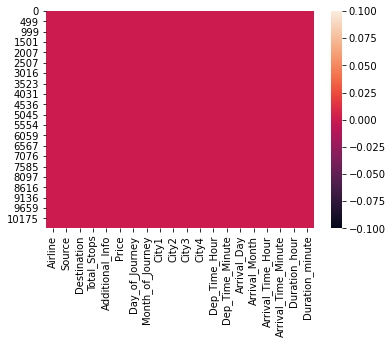

In [41]:
# Visualizing nulls
sns.heatmap(df.isnull())

Heatmap showing 0 null values in the dataset.

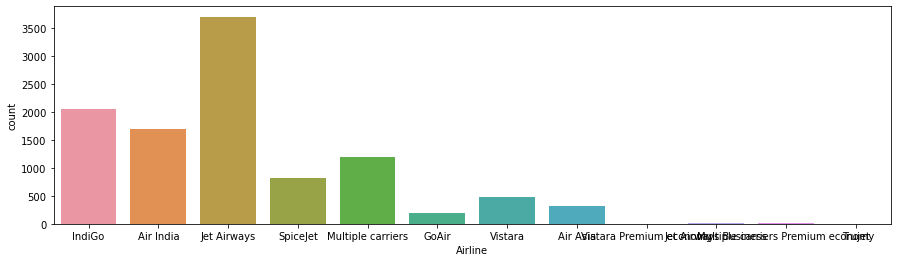

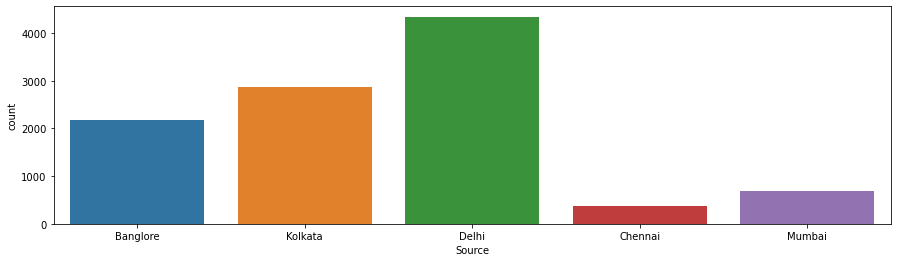

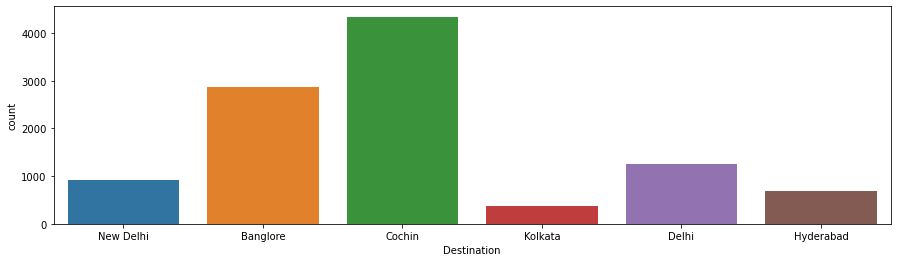

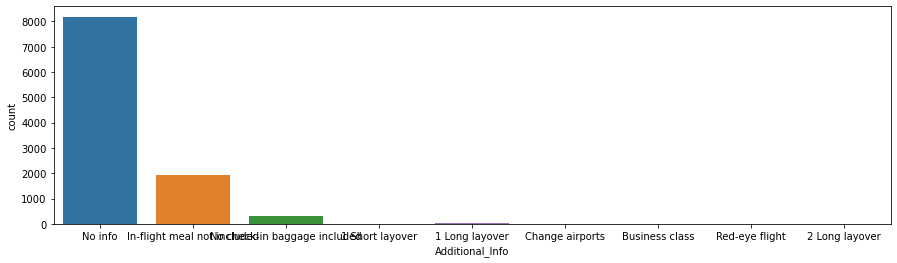

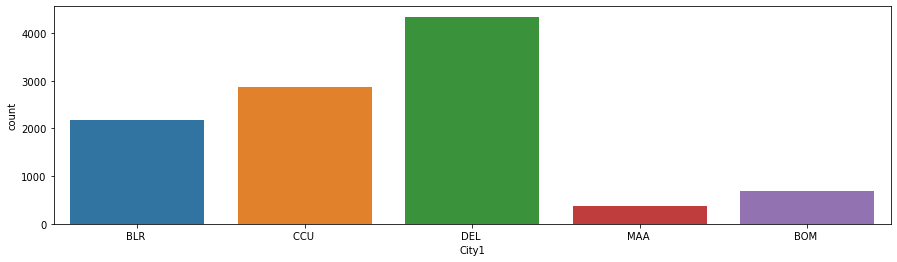

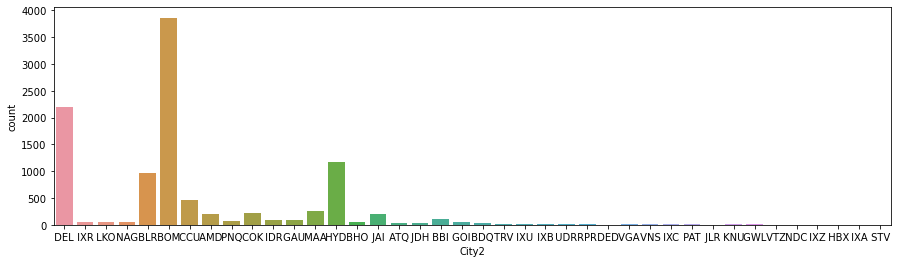

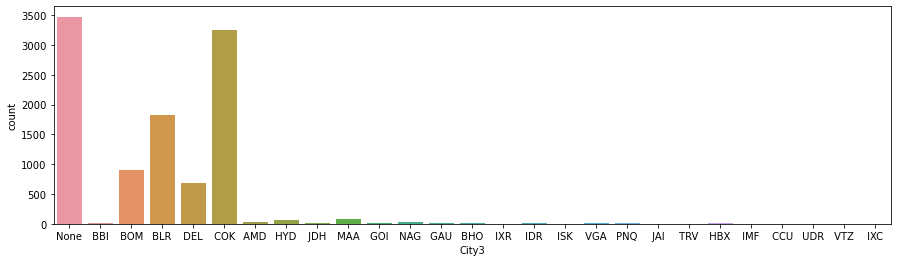

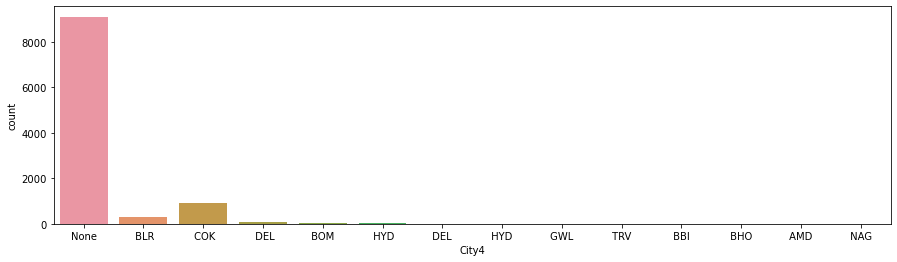

In [42]:
# Visualizing value counts for object type the columns
for i in df.columns :
    if df[i].dtypes=='object' :
        plt.figure(figsize=(15,4))
        sns.countplot(df[i])
        plt.show()

Jet Airways is the most preferred airline, followed by Indigo and AirIndia. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low. Majority of the flights take off from Delhi, Chennai has the least count of flight take-offs. Maximum flights land in Cochin followed by Banglore, Kolkata has the lowest count of landing flights. Maximum rows have No info as the value n column Additional_Info, We need to check how this column impacts the target. City1 has same data as source column. Majority of the flights take a stop in Bombay. Majority of the flights have no 2nd stop. If there is a second stop, chances are high of the place being Cochin. Majority of the flights have no 3rd stop.

In [43]:
# Describe dataset
df.describe()
#df.describe(include='all')

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.802218,9025.996845,12.631010,5.534557,12.478157,24.402543,24.349393,9.125609,13.387439,24.717044,10.027148,28.212408
std,0.660537,4624.358456,8.791551,2.995483,5.727398,18.814954,9.736892,3.625053,6.855827,16.568597,8.377850,16.878466
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5224.000000,5.000000,3.000000,8.000000,5.000000,16.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,6.000000,5.000000,11.000000,25.000000,31.000000,12.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12341.000000,21.000000,6.000000,18.000000,40.000000,31.000000,12.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,31.000000,12.000000,23.000000,55.000000,47.000000,55.000000


Total_Stops ranges from 0 to 4, Price ranges from 1759 to 79512, Day_of_Journey ranges from 3 to 27, Month_of_Journey ranges from 1 to 12, Dep_Time_Hour ranges from 0 to 23, Dep_Time_Minute ranges from 0-55, Arrival_Day ranges from 2 to 30, Arrival_Month ranges from 3 to 12, Arrival_Time_Hour ranges from 0-23, Arrival_Time_Minute ranges from 0-55, Duration_hour ranges from 1 to 47, Duration_minute ranges from 0-55.

Price,Day_of_Journey,Dep_Time_Hour,Duration_hour, have mean>median hence right skewness is there. Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_minute have left skewness, mean<median.

Price has high difference between 75% and max values hence outliers will be there but since this is the target column we are not going to treat it, other columns seem fine.

Standard deviation seem high for Price.

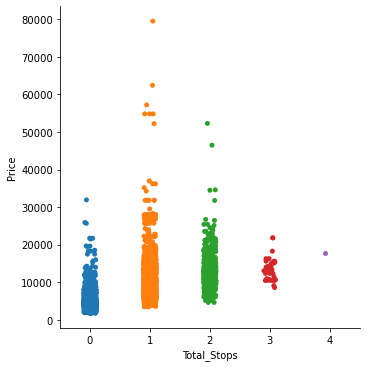

In [44]:
# Category plot for categorical data
sns.catplot(x='Total_Stops',y='Price',data=df,)

Flight prices are high for the routes having 1 total stops followed by 2 total stops. Just a few flights have 4 stops.

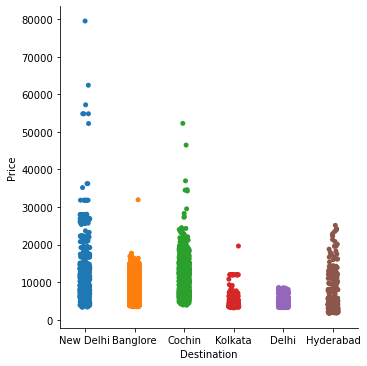

In [45]:
sns.catplot(x='Destination',y='Price',data=df)

Highest prices have been for New Delhi as destination followed by Cochin. and lowest prices are for Delhi as destination.

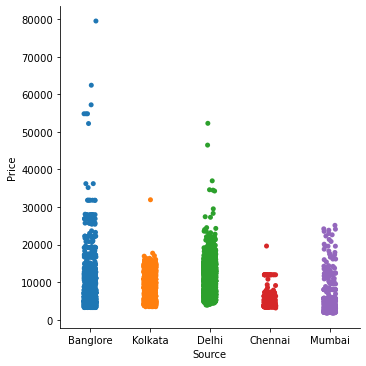

In [46]:
sns.catplot(x='Source',y='Price',data=df)

Highest prices have been for Source as Banglore followed by Delhi and Chennai is at last as a Source.

In [47]:
# Pivot table showing counts
pd.crosstab(df['Total_Stops'],df['Airline'])

Airline,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
Total_Stops,,,,,,,,,,,,
0,181,416,92,1231,622,0,0,0,667,0,263,3
1,129,540,102,793,2535,4,1145,13,148,1,215,0
2,9,701,0,19,543,2,43,0,0,0,0,0
3,0,35,0,0,0,0,8,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


Air Asia mostly flies non-stop or with 1 stop and rarely with 2 stops. Air India mostly have 2 stops. GoAir mostly flies with 1 stop. IndiGo highly flies non-stop and then with 1 stop and few times with 2 stops as well. Multiple carriers highly flies with 1 stop. SpiceJet flies non-stop mostly. Vistara Premium economy, Trujet, Multiple carriers Premium economy,Jet Airways Business flies very less times.

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

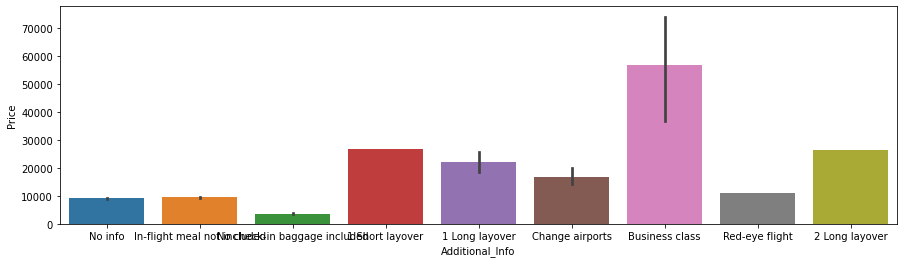

In [48]:
# Visualizing with barplot
plt.figure(figsize=(15,4))
sns.barplot(x='Additional_Info',y='Price',data=df)

In Additional_Info, Business class has highest price and No check-in baggage included has the lowest price.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

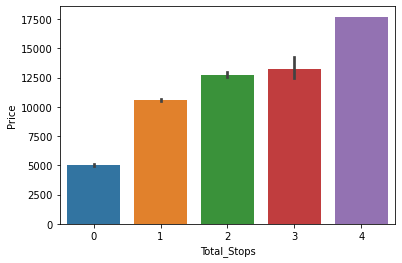

In [49]:
sns.barplot(x='Total_Stops',y='Price',data=df)

Here, Total_Stops and Price showing relationship that with increase in number of stops, prices also increases and hence 4 as Total_stops has highest Flight price and non-stop has lowest price range.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

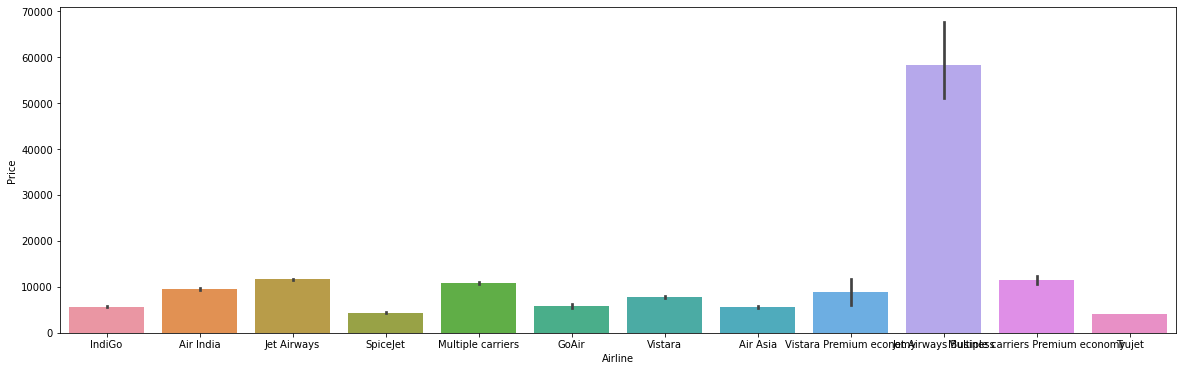

In [50]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline',y='Price',data=df)

Jet Airways Business charges highest price as compared to others.

<AxesSubplot:xlabel='Source', ylabel='Price'>

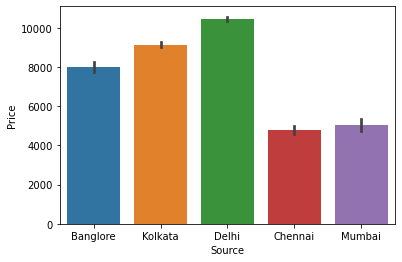

In [51]:
sns.barplot(x='Source',y='Price',data=df)

Source as Delhi has the highest flight price followed by Kolkata then then Banglore. Chennai as source has the lease fligt price comparatively.

<AxesSubplot:xlabel='Duration_hour', ylabel='Price'>

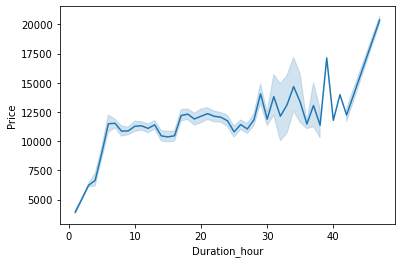

In [52]:
# Visualizing with lineplot
sns.lineplot(x='Duration_hour',y='Price',data=df)

Flight prices are lowest with 0 Duration_hour and highest with maximum Duration_hour.

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration_hour'>

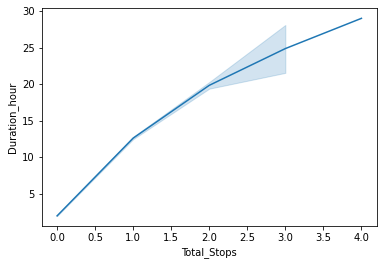

In [53]:
sns.lineplot(x='Total_Stops',y='Duration_hour',data=df)

Plot showing duration is increasing with increase in number of total stops, ensuring we are good with our dataset.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

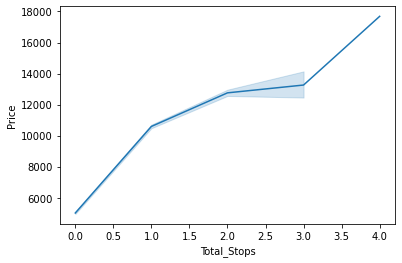

In [54]:
sns.lineplot(x='Total_Stops',y='Price',data=df)

Price is increasing with number of Total_Stops.

In [55]:
df.groupby('Source')['Price'].mean()

Source
Banglore     8022.872877
Chennai      4789.892388
Delhi       10461.600690
Kolkata      9143.083566
Mumbai       5042.083333
Name: Price, dtype: float64

Mean price is highest for Source Delhi followed by Kolkata and least is for Chennai.

In [56]:
df.groupby('Destination')['Price'].mean()

Destination
Banglore      9143.083566
Cochin       10461.600690
Delhi         5143.918577
Hyderabad     5042.083333
Kolkata       4789.892388
New Delhi    12007.421225
Name: Price, dtype: float64

Mean price is highest for Destination New Delhi followed by Cochin and least is for Kolkata.

In [57]:
df.groupby('Total_Stops')['Price'].mean()

Total_Stops
0     5018.506763
1    10594.123556
2    12757.632498
3    13260.674419
4    17686.000000
Name: Price, dtype: float64

Mean price is highest for Total_Stops 4 and least is for 0 as Total_Stops.

In [58]:
df.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9552.018311
GoAir                                 5861.056701
IndiGo                                5668.469897
Jet Airways                          11599.021081
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4335.841718
Trujet                                4140.000000
Vistara                               7801.355649
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

Mean price is highest for Airline Jet Airways Business  and least is for Trujet.

### Dividing the data in categorical and numeric columns

In [59]:
# Categorical data
df_cat=df.select_dtypes(include='object')
df_cat.head()

,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL,None


In [60]:
# Continuous data
df_con=df.select_dtypes(exclude='object')

# Removing the target column
df_con.drop('Price',axis=1,inplace=True)

# Checking Dataset
df_con.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,24,3,22,20,22,3,1,10,2,50
1,2,5,1,5,50,31,12,13,15,7,25
2,2,6,9,9,25,10,6,4,25,19,0
3,1,5,12,18,5,31,12,23,30,5,25
4,1,3,1,16,50,31,12,21,35,4,45


In [61]:
# Checking outliers
from scipy.stats import zscore
z=np.abs(zscore(df_con))
np.where(z>3)

(array([  226,   402,   553,   918,   965,   968,  1065,  1111,  1216,
         1344,  1438,  1492,  1547,  1653,  1661,  1784,  1797,  2160,
         2160,  2540,  2609,  2619,  2627,  2640,  2701,  2701,  2797,
         2805,  3132,  3195,  3290,  3466,  3538,  3554,  3755,  3780,
         3780,  3908,  3929,  4008,  4078,  4078,  4418,  4418,  4606,
         4606,  4710,  4995,  5384,  5451,  5636,  5646,  5717,  5773,
         5864,  5878,  5884,  5926,  5988,  6014,  6247,  6369,  6398,
         6519,  6911,  6941,  7095,  7137,  7154,  7209,  7232,  7453,
         7486,  7510,  7646,  7768,  7768,  7798,  8012,  8038,  8038,
         8085,  8284,  8287,  8469,  8469,  8488,  8560,  8591,  8591,
         8882,  9028,  9089,  9232,  9287,  9379,  9397,  9495,  9525,
         9830, 10120, 10246, 10419, 10419], dtype=int64),
 array([9, 0, 9, 0, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 0, 9, 9, 0, 9, 9, 0, 0,
        9, 9, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 0, 9, 9, 0, 9, 0, 9,
        0, 9,

Output showing there are presence of outliers in the columns.

In [62]:
# Checking the outlier in the dataset
z[226][9]

3.2196974253240516

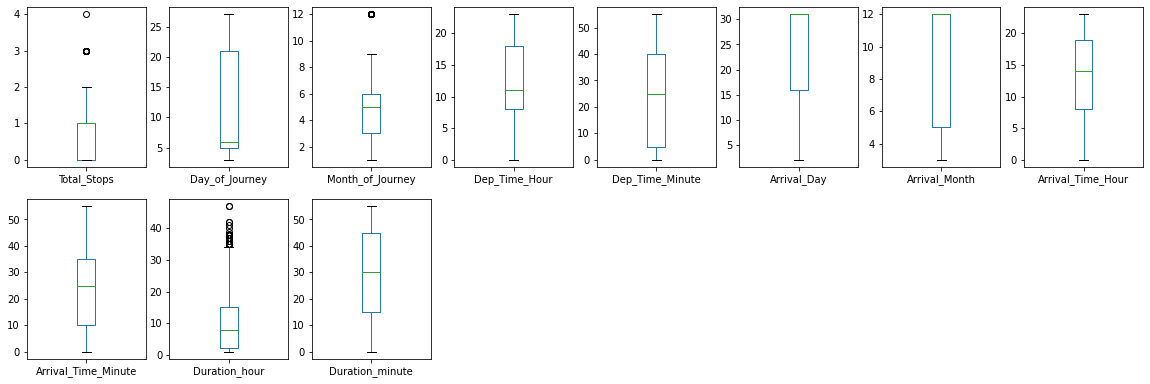

In [63]:
# Visualising outliers
df_con.plot(kind='box',subplots=True,layout=(3,8), figsize=(20,10))
plt.show()

Outliers are present in columns Total_Stops, Month_of_Journey and Duration_hour but these columns have impact on target column hence we will not remove these outliers.

In [64]:
# Checking skewness
df_con.skew()

Total_Stops            0.332400
Day_of_Journey         0.375849
Month_of_Journey       0.630898
Dep_Time_Hour          0.108461
Dep_Time_Minute        0.171488
Arrival_Day           -1.106986
Arrival_Month         -0.553868
Arrival_Time_Hour     -0.378863
Arrival_Time_Minute    0.110791
Duration_hour          0.892611
Duration_minute       -0.086035
dtype: float64

Skewness is present in the dataset as acceptable range is +/-5.

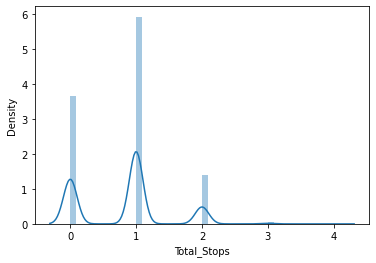

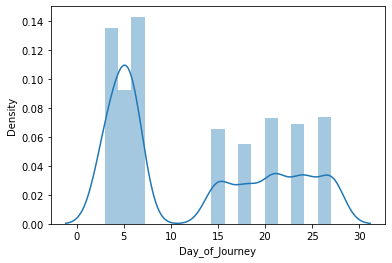

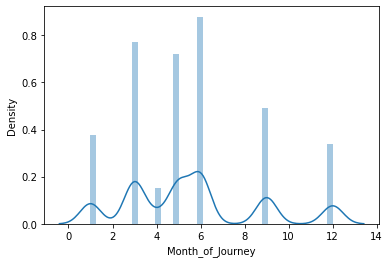

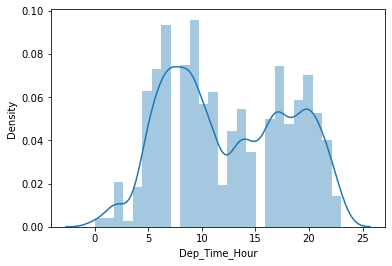

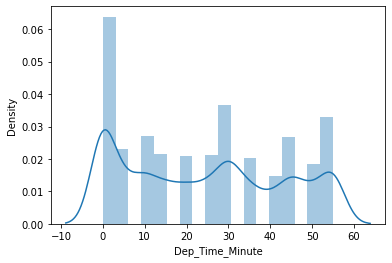

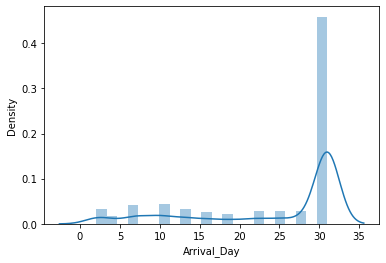

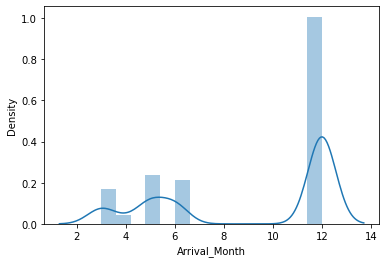

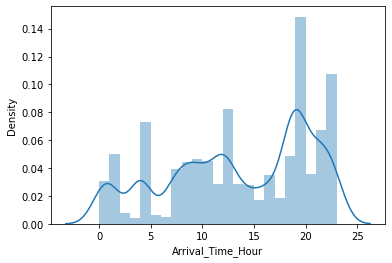

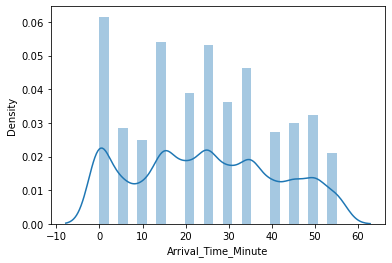

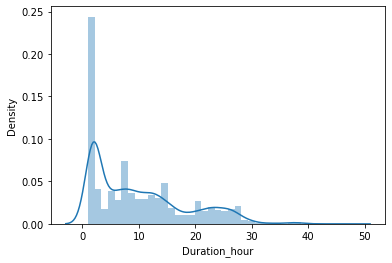

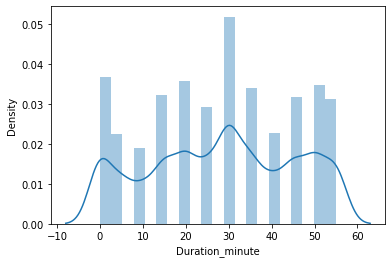

In [65]:
# Visualizing skewness
for i in df_con.columns :
    sns.distplot(df_con[i])
    plt.show()

We need to treat skewness for 'Arrival_Date','Duration_hour' column, considering a threshold value for skewness as +/-0.5 (we will not transform ‘Price’ column, since it is our target variable).

### Data Cleaning

In [66]:
# Checking skewness 
df1=df_con.copy()
df1.skew()

Total_Stops            0.332400
Day_of_Journey         0.375849
Month_of_Journey       0.630898
Dep_Time_Hour          0.108461
Dep_Time_Minute        0.171488
Arrival_Day           -1.106986
Arrival_Month         -0.553868
Arrival_Time_Hour     -0.378863
Arrival_Time_Minute    0.110791
Duration_hour          0.892611
Duration_minute       -0.086035
dtype: float64

We can see now skewness is present in the columns : Month_of_Journey,Arrival_Day,Duration_hour.

In [67]:
# Removing skewness
df2=df1.copy()
df2['Month_of_Journey']=np.log(df1['Month_of_Journey']+1)
#df2['Arrival_Day']=np.log(df1['Arrival_Day']+1)
df2['Duration_hour']=np.log(df1['Duration_hour']+1)
df2.skew()

Total_Stops            0.332400
Day_of_Journey         0.375849
Month_of_Journey      -0.526255
Dep_Time_Hour          0.108461
Dep_Time_Minute        0.171488
Arrival_Day           -1.106986
Arrival_Month         -0.553868
Arrival_Time_Hour     -0.378863
Arrival_Time_Minute    0.110791
Duration_hour         -0.075847
Duration_minute       -0.086035
dtype: float64

Removed skewness from Month_of_Journey, Duration_hour. But skewness is still there in column Arrival_Day.

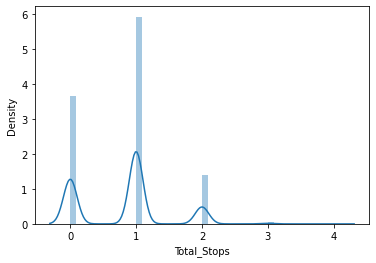

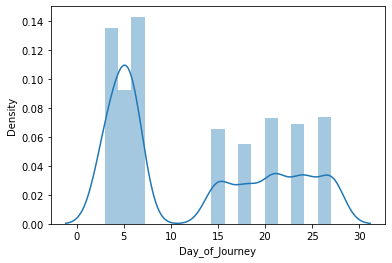

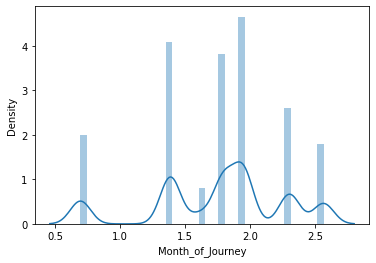

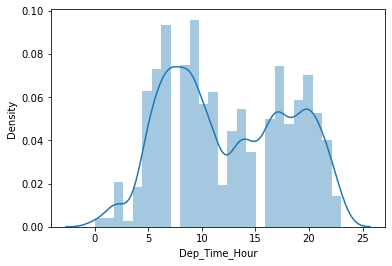

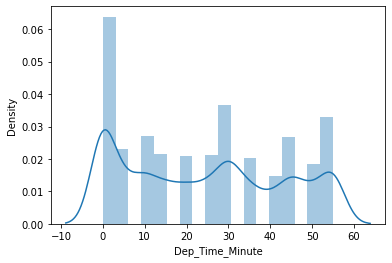

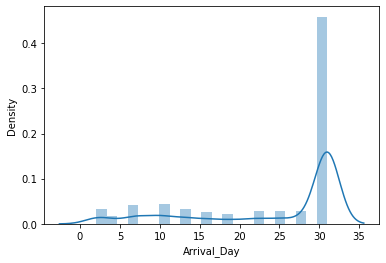

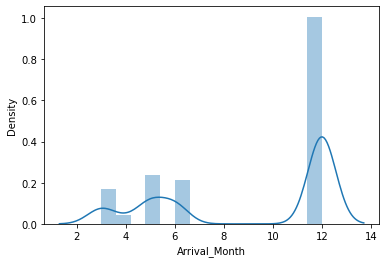

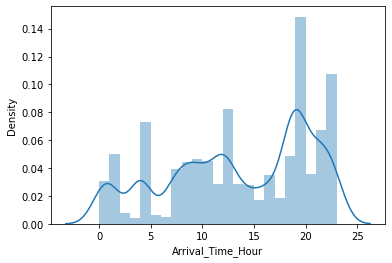

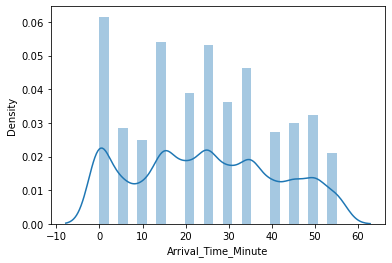

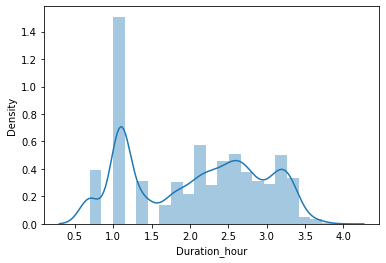

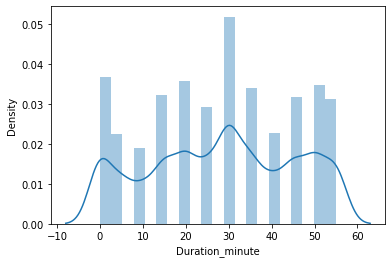

In [68]:
# Visualizng skewness
for i in df2.columns :
    sns.distplot(df2[i])
    plt.show()

Removed skewness from all columns but in column 'Arrival_Day' skewness is increasing on further applying any transformations. Hence we can consider the present values as skewness threshold based on the kind of data distribution.

In [69]:
# Checking the new dataset
df2

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,0,24,1.386294,22,20,22,3,1,10,1.098612,50
1,2,5,0.693147,5,50,31,12,13,15,2.079442,25
2,2,6,2.302585,9,25,10,6,4,25,2.995732,0
3,1,5,2.564949,18,5,31,12,23,30,1.791759,25
4,1,3,0.693147,16,50,31,12,21,35,1.609438,45
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,2.302585,19,55,31,12,22,25,1.098612,30
10679,0,27,1.609438,20,45,31,12,23,20,1.098612,35
10680,0,27,1.609438,8,20,31,12,11,20,1.386294,0
10681,0,3,0.693147,11,30,31,12,14,10,1.098612,40


### Apply encoding on categorical columns

In [70]:
# Checking for the unique values
for i in df_cat.columns :
    print(i)
    print(df_cat[i].unique())

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight' '2 Long layover']
City1
['BLR ' 'CCU ' 'DEL ' 'MAA ' 'BOM ']
City2
[' DEL ' ' IXR ' ' LKO ' ' NAG ' ' BLR ' ' BOM ' ' CCU ' ' AMD ' ' PNQ '
 ' COK ' ' IDR ' ' GAU ' ' MAA ' ' HYD ' ' BHO ' ' JAI ' ' ATQ ' ' JDH '
 ' BBI ' ' GOI ' ' BDQ ' ' TRV ' ' IXU ' ' IXB ' ' UDR ' ' RPR ' ' DED '
 ' VGA ' ' VNS ' ' IXC ' ' PAT ' ' JLR ' ' KNU ' ' GWL ' ' VTZ ' ' NDC '
 ' IXZ ' ' HBX ' ' IXA ' ' STV ']
City3
['None' ' BBI ' ' BOM ' ' BLR ' ' DEL ' ' COK ' ' AMD ' ' HYD ' ' JDH '
 ' MAA ' ' GOI ' '

In [71]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc=df_cat.copy()
le=LabelEncoder()
for i in df_cat_enc.columns :
    df_cat_enc[i]=le.fit_transform(df_cat[i])
df_cat_enc

,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,3,0,5,7,0,10,26,13
1,1,3,0,7,2,20,1,3
2,4,2,1,7,3,27,4,5
3,3,3,0,7,2,29,3,13
4,3,0,5,7,0,29,7,13
...,...,...,...,...,...,...,...,...
10678,0,3,0,7,2,5,26,13
10679,1,3,0,7,2,5,26,13
10680,4,0,2,7,0,10,26,13
10681,10,0,5,7,0,10,26,13


Categorical columns with object datatypes are now encoded having 10461 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [72]:
dff=pd.concat([df_con,df_cat_enc,df['Price']],axis=1)

# Dropping the nulls after concatination, if any
dff.dropna(inplace=True)

# Checking the null values
dff.isnull().sum().any()

False

Combined all the columns and removed nulls

In [73]:
# Checking shape of new dataset
dff.shape

(10461, 20)

New dataset is having 10461 rows and 20 columns.

In [74]:
# Checking dataset values
dff

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4,Price
0,0,24,3,22,20,22,3,1,10,2,50,3,0,5,7,0,10,26,13,3897
1,2,5,1,5,50,31,12,13,15,7,25,1,3,0,7,2,20,1,3,7662
2,2,6,9,9,25,10,6,4,25,19,0,4,2,1,7,3,27,4,5,13882
3,1,5,12,18,5,31,12,23,30,5,25,3,3,0,7,2,29,3,13,6218
4,1,3,1,16,50,31,12,21,35,4,45,3,0,5,7,0,29,7,13,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,19,55,31,12,22,25,2,30,0,3,0,7,2,5,26,13,4107
10679,0,27,4,20,45,31,12,23,20,2,35,1,3,0,7,2,5,26,13,4145
10680,0,27,4,8,20,31,12,11,20,3,0,4,0,2,7,0,10,26,13,7229
10681,0,3,1,11,30,31,12,14,10,2,40,10,0,5,7,0,10,26,13,12648


All the required columns are encoded and are in numeric form.

### EDA and Visualizatons

In [75]:
# Describng the dataset
dff.describe()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4,Price
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,0.802218,12.631010,5.534557,12.478157,24.402543,24.349393,9.125609,13.387439,24.717044,10.027148,28.212408,3.981359,1.953446,1.439346,6.584170,2.005066,9.573846,12.230188,11.925055,9025.996845
std,0.660537,8.791551,2.995483,5.727398,18.814954,9.736892,3.625053,6.855827,16.568597,8.377850,16.878466,2.364560,1.186215,1.481007,0.837296,1.208666,6.355379,9.964534,2.814522,4624.358456
min,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,0.000000,5.000000,3.000000,8.000000,5.000000,16.000000,5.000000,8.000000,10.000000,2.000000,15.000000,3.000000,2.000000,0.000000,7.000000,1.000000,6.000000,4.000000,13.000000,5224.000000
50%,1.000000,6.000000,5.000000,11.000000,25.000000,31.000000,12.000000,14.000000,25.000000,8.000000,30.000000,4.000000,2.000000,1.000000,7.000000,2.000000,6.000000,6.000000,13.000000,8266.000000
75%,1.000000,21.000000,6.000000,18.000000,40.000000,31.000000,12.000000,19.000000,35.000000,15.000000,45.000000,4.000000,3.000000,2.000000,7.000000,3.000000,10.000000,26.000000,13.000000,12341.000000
max,4.000000,27.000000,12.000000,23.000000,55.000000,31.000000,12.000000,23.000000,55.000000,47.000000,55.000000,11.000000,4.000000,5.000000,8.000000,4.000000,39.000000,26.000000,13.000000,79512.000000


In above table, mean and median are almost similar hence could not see skewness and also the difference of 75 percentle and max value is not much hence no outliers are present n the dataset. Standard deviation is high only for few columns, rest all details seem good.

In [76]:
# Checking correlation
dff.corr()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4,Price
Total_Stops,1.000000,-0.035188,0.065422,-0.067641,-0.002932,-0.371748,-0.428292,0.051419,-0.107450,0.730529,-0.150051,-0.194376,0.193962,-0.292007,-0.064883,0.417377,0.152225,-0.812042,-0.709039,0.601889
Day_of_Journey,-0.035188,1.000000,-0.265199,-0.007553,-0.013372,0.347001,0.036126,-0.001094,-0.019435,-0.046943,-0.007854,0.031788,0.008015,-0.051692,-0.017924,0.089435,-0.012908,0.043116,-0.001191,-0.170991
Month_of_Journey,0.065422,-0.265199,1.000000,0.028454,0.001902,-0.038615,-0.021926,-0.003047,-0.023650,0.056850,-0.021488,-0.008662,0.062725,-0.104599,-0.000407,0.042319,0.001914,-0.069097,-0.040345,0.008636
Dep_Time_Hour,-0.067641,-0.007553,0.028454,1.000000,-0.015150,-0.397774,-0.464113,-0.003849,0.072895,-0.000577,-0.018764,-0.032196,0.060127,-0.074124,-0.056199,-0.047416,-0.105600,0.017615,0.055766,0.005050
Dep_Time_Minute,-0.002932,-0.013372,0.001902,-0.015150,1.000000,0.012740,0.006581,0.046519,-0.021596,-0.021995,0.089464,-0.062267,-0.056847,0.128405,-0.022872,-0.074782,0.087364,0.045824,-0.045925,-0.024395
Arrival_Day,-0.371748,0.347001,-0.038615,-0.397774,0.012740,1.000000,0.821207,0.437371,-0.037814,-0.560537,0.011837,0.106331,-0.101014,0.133025,0.121497,-0.095284,0.016572,0.348989,0.233282,-0.332672
Arrival_Month,-0.428292,0.036126,-0.021926,-0.464113,0.006581,0.821207,1.000000,0.516818,-0.053535,-0.647258,0.010053,0.122692,-0.093885,0.130237,0.145405,-0.118015,0.035260,0.387048,0.280858,-0.344131
Arrival_Time_Hour,0.051419,-0.001094,-0.003047,-0.003849,0.046519,0.437371,0.516818,1.000000,-0.152128,0.065635,-0.116648,-0.005393,0.028198,-0.044646,0.026636,0.021545,-0.013630,-0.089902,0.035825,0.030963
Arrival_Time_Minute,-0.107450,-0.019435,-0.023650,0.072895,-0.021596,-0.037814,-0.053535,-0.152128,1.000000,-0.075750,0.156456,-0.072842,0.021097,0.016170,0.042169,-0.172673,0.041867,0.157294,-0.028541,-0.086504
Duration_hour,0.730529,-0.046943,0.056850,-0.000577,-0.021995,-0.560537,-0.647258,0.065635,-0.075750,1.000000,-0.134178,-0.152128,0.167283,-0.255184,-0.156089,0.283535,0.020277,-0.662708,-0.452252,0.504518


<AxesSubplot:>

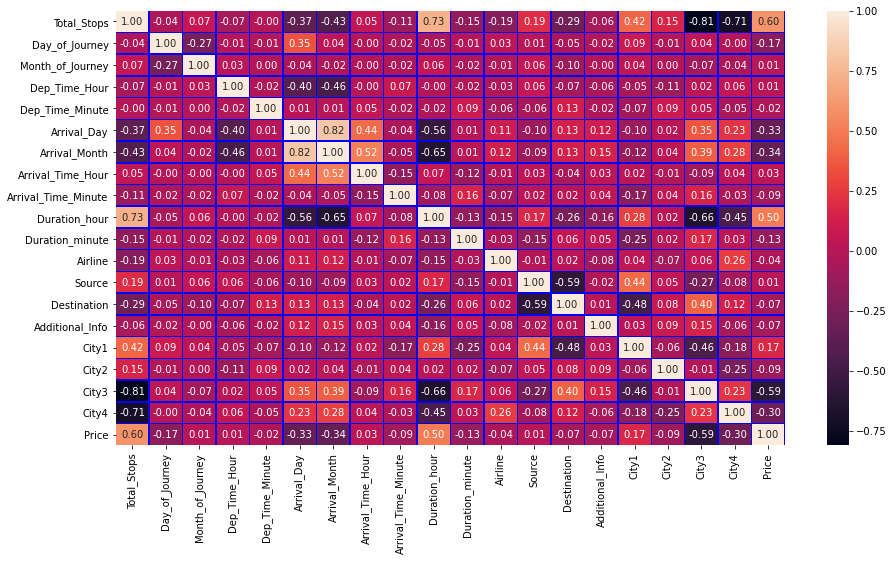

In [77]:
# Visualizing correlation
plt.figure(figsize=(15,8))
sns.heatmap(dff.corr(),annot=True,linewidths=0.5,linecolor='b',fmt='.2f')

Target 'Price' has strong positive linear correlation with Total_Stops,Duration_hour and strong negative linear correlation with Arrival_Day,Arrival_Month,City3,City4.

Month_of_Journey has good correlation with Day_of_Journey. Arrival_Day has good correlation with Total_Stops,Day_of_Journey,Dep_Time_Hour. Arrival_Month has good correlation with Total_Stops,Dep_Time_Hour & strong coorelation with Arrival_Day. Arrival_Time_Hour has good correlation with Arrival_Day,Arrival_Month. Duration_hour has strong correlation with Total_Stops,Arrival_Day,Arrival_Month. Destination has good correlation with Total_Stops,Duration_hour & strong coorelation with Source. City1 has good correlation withTotal_Stops,Duration_hour,Source,Destination. City3 has good correlation with Arrival_Day,Arrival_Month,Source,Destination,City1 & strong coorelation with Total_Stops,Duration_hour. City4 has good correlation with Arrival_Day,Arrival_Month,Duration_hour,Airline,City3 & strong coorelation with Total_Stops. 

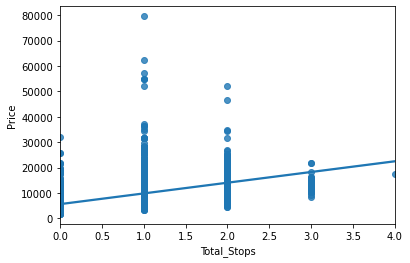

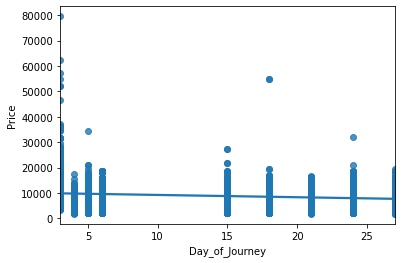

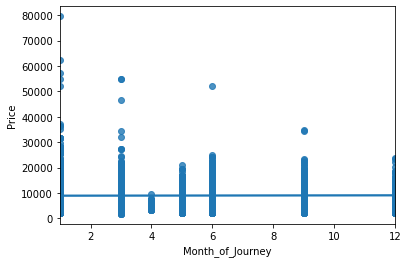

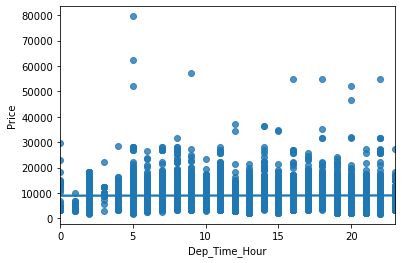

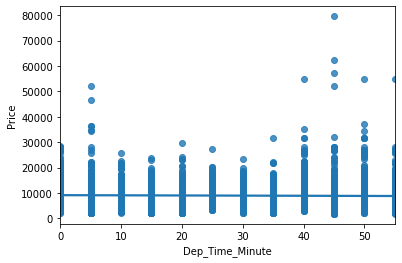

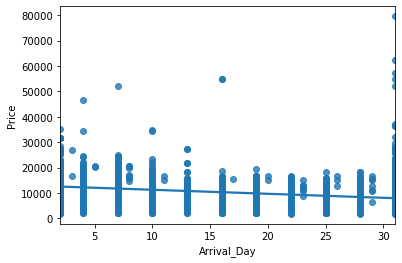

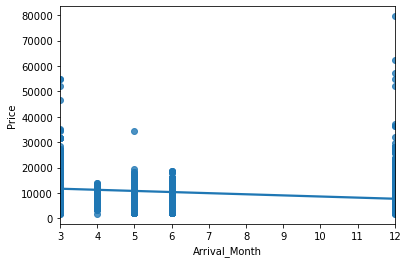

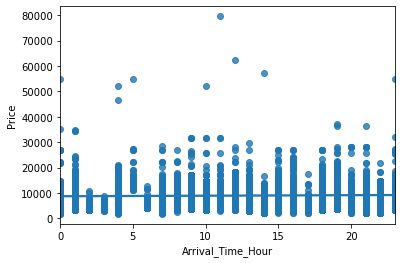

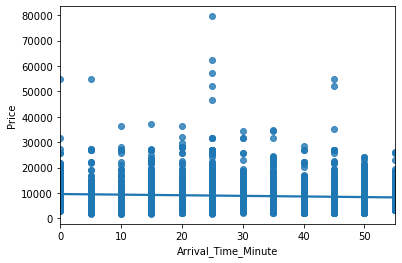

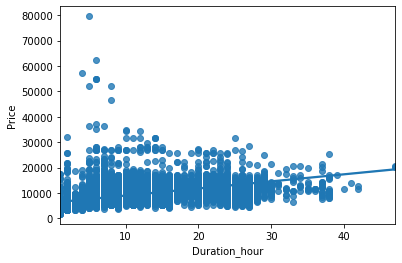

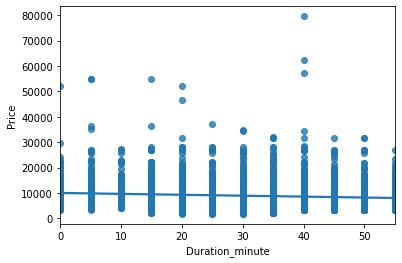

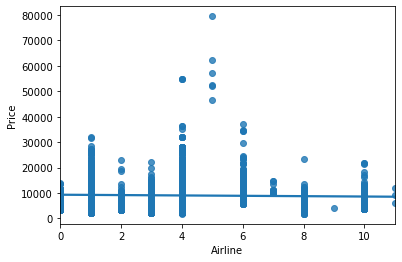

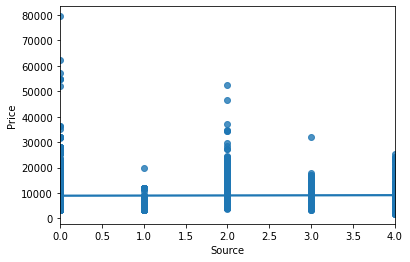

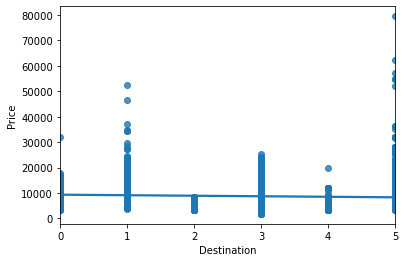

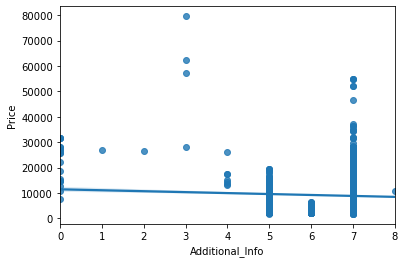

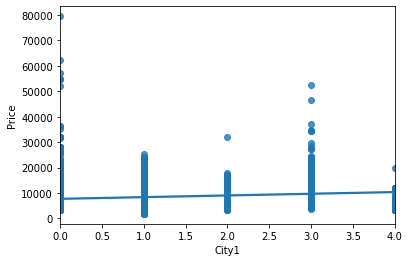

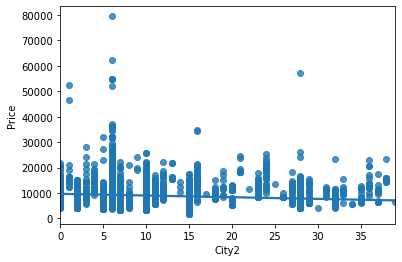

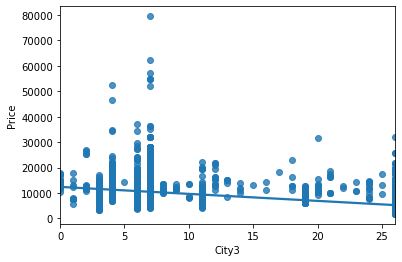

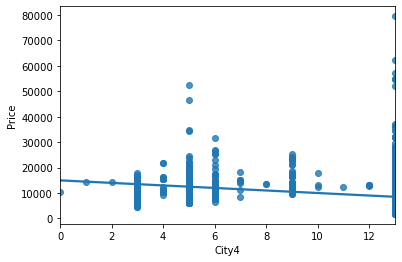

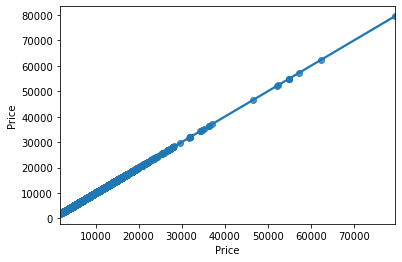

In [78]:
# Visualizing with regression plot
for i in dff.columns :
    sns.regplot(dff[i],dff['Price'])
    plt.show()

Target 'Price' has strong positive linear correlation with Total_Stops,Duration_hour and strong negative linear correlation with Arrival_Day,Arrival_Month,City3,City4.

### Dividing dataset in x and y

In [79]:
x=dff.drop('Price',axis=1)
x

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,0,24,3,22,20,22,3,1,10,2,50,3,0,5,7,0,10,26,13
1,2,5,1,5,50,31,12,13,15,7,25,1,3,0,7,2,20,1,3
2,2,6,9,9,25,10,6,4,25,19,0,4,2,1,7,3,27,4,5
3,1,5,12,18,5,31,12,23,30,5,25,3,3,0,7,2,29,3,13
4,1,3,1,16,50,31,12,21,35,4,45,3,0,5,7,0,29,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,19,55,31,12,22,25,2,30,0,3,0,7,2,5,26,13
10679,0,27,4,20,45,31,12,23,20,2,35,1,3,0,7,2,5,26,13
10680,0,27,4,8,20,31,12,11,20,3,0,4,0,2,7,0,10,26,13
10681,0,3,1,11,30,31,12,14,10,2,40,10,0,5,7,0,10,26,13


In [80]:
y=dff['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10461, dtype: int64

In [81]:
# Checking shapes of x and y 
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (10461, 19)
Shape of y :  (10461,)


### Multicollinearity with VIF

In [82]:
# Imporing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Checking multicollinearity of every column
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,Total_Stops,28.255344
1,Day_of_Journey,5.261002
2,Month_of_Journey,5.126938
3,Dep_Time_Hour,22.614576
4,Dep_Time_Minute,2.804938
5,Arrival_Day,36.748862
6,Arrival_Month,104.273962
7,Arrival_Time_Hour,29.201947
8,Arrival_Time_Minute,3.609724
9,Duration_hour,22.426879


In [143]:
# Drop high Multicollinear column
x1=x.drop('Arrival_Month',axis=1)
calc_vif(x1)

,Variables,VIF Factors
0,Total_Stops,19.567526
1,Day_of_Journey,5.249213
2,Month_of_Journey,5.045881
3,Dep_Time_Hour,9.811188
4,Dep_Time_Minute,2.787492
5,Arrival_Day,35.567766
6,Arrival_Time_Hour,10.654392
7,Arrival_Time_Minute,3.568934
8,Duration_hour,9.433234
9,Duration_minute,4.221372


In dataset, among multicolnear columns the features that are contributing less to the output variable can be dropped. We can drop 1-2 columns showing high colinearity but not all as it impacts the output.

Machine learning needs refined dataset. It needs only those columns that are highly contributing to the output. Clean data for which EDA is used. This is for better learning and prediction of data by models.

Once refining is done we'll do Standard Scaler to make all data scaled to mean=0 and std.dev.=+-1, so that prediction could be nearby.

### Scaling : Standard Scaler / Min-Max Scaler

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(x1)
x2=pd.DataFrame(xs,columns=x1.columns)
x2

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,-1.214552,1.293234,-0.846167,1.662587,-0.234003,-0.241299,-1.806935,-0.888292,-0.958185,1.290913,-0.415048,-1.646868,2.404327,0.496658,-1.658988,0.067057,1.381948,0.381946
1,1.813434,-0.868035,-1.513870,-1.305744,1.360550,0.683064,-0.056515,-0.586502,-0.361345,-0.190335,-1.260912,0.882305,-0.971917,0.496658,-0.004192,1.640603,-1.127070,-3.171225
2,1.813434,-0.754284,1.156945,-0.607313,0.031756,-1.473784,-1.369330,0.017079,1.071072,-1.671583,0.007884,0.039248,-0.296668,0.496658,0.823206,2.742085,-0.825988,-2.460591
3,0.299441,-0.868035,2.158500,0.964156,-1.031279,0.683064,1.402168,0.318869,-0.600081,-0.190335,-0.415048,0.882305,-0.971917,0.496658,-0.004192,3.056794,-0.926348,0.381946
4,0.299441,-1.095537,-1.513870,0.614941,1.360550,0.683064,1.110431,0.620659,-0.719449,0.994664,-0.415048,-1.646868,2.404327,0.496658,-1.658988,3.056794,-0.524905,0.381946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10456,-1.214552,-0.981786,1.156945,1.138764,1.626309,0.683064,1.256300,0.017079,-0.958185,0.105915,-1.683844,0.882305,-0.971917,0.496658,-0.004192,-0.719715,1.381948,0.381946
10457,-1.214552,1.634487,-0.512315,1.313372,1.094791,0.683064,1.402168,-0.284711,-0.958185,0.402164,-1.260912,0.882305,-0.971917,0.496658,-0.004192,-0.719715,1.381948,0.381946
10458,-1.214552,1.634487,-0.512315,-0.781921,-0.234003,0.683064,-0.348252,-0.284711,-0.838817,-1.671583,0.007884,-1.646868,0.378581,0.496658,-1.658988,0.067057,1.381948,0.381946
10459,-1.214552,-1.095537,-1.513870,-0.258098,0.297515,0.683064,0.089353,-0.888292,-0.958185,0.698414,2.545475,-1.646868,2.404327,0.496658,-1.658988,0.067057,1.381948,0.381946


### Find best random state for Train-Test Split

In [145]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import time

In [147]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.1,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    #if round(acctrain,2)==round(acctest,2) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Random state with maximum accuracy : ',rs,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',maxAcc*100)

Random state with maximum accuracy :  95  Accuracy(Training) :  48.879809784837605  Accuracy(Testing) :  55.447045621483305


Here, training & testing accuracies are almost same for random state=95. So, lets take 95 as our best random state.

In [148]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.1,random_state=95)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9414, 18)
(1047, 18)
(9414,)
(1047,)


In [149]:
y_train.value_counts()

10262    232
10844    193
7229     144
4804     143
4823     116
        ... 
16946      1
10783      1
6878       1
19172      1
4098       1
Name: Price, Length: 1775, dtype: int64

Huge difference is there in both classes of training set hence balancing the class now.

### Finding the best algorithm

In [150]:
# Making instance of regressors
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
xg=GradientBoostingRegressor()

In [151]:
#Executing all algorithms in a single for loop

algo_list=[dtr,knn,rf,xg]
#svr_kernel=['rbf','poly','linear']
#Acc=0
#kv=''
for i in algo_list :    
    #if i==svr :
    #    for j in svr_kernel :
    #        svr=SVR(kernel=j)
    #        svr.fit(x_train,y_train)
    #        pred=svr.predict(x_test)
    #        acc=r2_score(y_test,pred)
    #        if acc>Acc :
    #            Acc=acc
    #            kv=j
    #    svr1=SVR(kernel=j)
    #    print(svr1)
    #    svr1.fit(x_train,y_train)
    #    predtrain=svr1.predict(x_train)
    #    predtest=svr1.predict(x_test)
    #    acctrain=r2_score(y_train,predtrain)
    #    acctest=r2_score(y_test,predtest)
    #    err1=mean_absolute_error(y_test,predtest)
    #    err2=mean_squared_error(y_test,predtest)
        
    print(i)
    i.fit(x_train,y_train)
    predtrain=i.predict(x_train)
    predtest=i.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    err1=mean_absolute_error(y_test,predtest)
    err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

DecisionTreeRegressor()
Accuracy(Training) :  99.56835232864596  Accuracy(Test)  61.125779528279445
mean_absolute_error 737.5754536771728
mean_squared_error 7697704.410936007


KNeighborsRegressor()
Accuracy(Training) :  82.99374871505468  Accuracy(Test)  81.26388452146365
mean_absolute_error 1184.570964660936
mean_squared_error 3710044.26617001


RandomForestRegressor()
Accuracy(Training) :  98.03407383558462  Accuracy(Test)  88.85354705609411
mean_absolute_error 612.6712290216947
mean_squared_error 2207172.232688564


GradientBoostingRegressor()
Accuracy(Training) :  84.06616128459649  Accuracy(Test)  85.29048774941262
mean_absolute_error 1200.9764323975037
mean_squared_error 2912713.7717509656




RandomForestClassifier has the highest accuracy but let's go for cross validation for all the models used.

In [152]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',np.abs(cross_val_score(i,x2,y,cv=5).mean()*100))

CV mean of  DecisionTreeRegressor()  is  78.78119084834394
CV mean of  KNeighborsRegressor()  is  72.43881219871274
CV mean of  RandomForestRegressor()  is  87.75970051272822
CV mean of  GradientBoostingRegressor()  is  82.83726855558864


Looking at difference of accuracy and cv mean, opting for RandomForestRegressor as our best model with accuracy of 89% and having least difference between accuracy and cv mean.

### Hyperparameter Tuning

In [94]:
# Using hyper parameter tuning on selected model for better accuracy and to avoid overfitting issues
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100],
              'criterion':['squared_error','absolute_error','poisson'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[None,1,2,3]}
              
rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [153]:
from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(criterion='poisson',max_depth=None,max_features='log2',n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(rf,x2,y,cv=5).mean()

print('Accuracy : ',acc,' CV mean : ',cv)

Accuracy :  0.8596717643063326  CV mean :  0.8203049188838338


#### We are getting model accuracy as approx 86% and cv mean as approx 82%, this shows our model is performing good.

### AUC-ROC Curve

AUC-ROC is not available for regression problems, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [154]:
# Saved the model in .pkl file
import pickle #import joblib
file='flight_price.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [155]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.8596717643063326

In [156]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(1047, 18)
(1047,)


In [157]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':predicted.astype(int)})
conclusion[:30]

,Orignal,Predicted
0,12373,11956
1,14714,13860
2,14871,15946
3,11087,11611
4,11134,12432
5,9166,9156
6,6838,7438
7,16736,15483
8,10844,10270
9,4823,4859


### Importing test dataset

In [158]:
# Importing test set
df_test=pd.read_excel('C:/Users/Dazzle/Desktop/DataTrained/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


In [159]:
#Checking the dataset shape
df_test.shape

(2671, 10)

Dataset is having 2671 rows and 10 columns.

### Applying all the data modeling processes and operations on the test data that we did on the training data, and then will make the final prediction using the saved model object.

In [160]:
# Checking for the nulls in dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


It gives additional information regarding the dataset like RangeIndex, Data columns, datatypes. There are no null values in the dataset. Date_of_Journey,Dep_Time & Arrival_Time are of object type we can convert this to relevant format.

### Data Preprocessing 

In [161]:
# Checking which all column values are relevant for model training
for i in df_test.columns :
    print(i,' : ', df_test[i].dtypes)
    print('Unique values : ',df_test[i].nunique())
    print('Value counts  : ',df_test[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  11
Value counts  :  Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
----------------------
Date_of_Journey  :  object
Unique values :  44
Value counts  :  9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/03/2019     65
27/05/2019     65


Data types of few columns need to be changed and feature engineering is required here to add separate columns based on values in Date_of_Journey, Route, Dep_Time, Arrival_Time, Duration, Total_Stops. 'Additional_Info' has 2 different values with 'No info' and 'No Info' which needs to be merged.

In [162]:
# Converting the datetime columns to relevant datatype
for i in ['Date_of_Journey','Dep_Time','Arrival_Time'] :
    df_test[i]=pd.to_datetime(df_test[i])
df_test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [163]:
# Treating column Date_of_Journey
df_test['Day_of_Journey']=df_test['Date_of_Journey'].dt.day
df_test['Month_of_Journey']=df_test['Date_of_Journey'].dt.month
df_test['Year_of_Journey']=df_test['Date_of_Journey'].dt.year
df_test.drop('Date_of_Journey',axis=1,inplace=True)
df_test.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2021-12-31 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,2021-12-31 06:20:00,2021-12-31 10:20:00,4h,1 stop,No info,5,12,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,2021-12-31 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019


In [164]:
# Checking for the total stops to confirm what should be the maximum number of cities in the longest Route
df_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route.

In [165]:
# Treating column Route
df_test['Route1']=df_test.Route.str.split('→')

# Creating new columns by splitting Route column
df_test['City1']=df_test.Route1.str[0]
df_test['City2']=df_test.Route1.str[1]
df_test['City3']=df_test.Route1.str[2]
df_test['City4']=df_test.Route1.str[3]
df_test['City5']=df_test.Route1.str[4]
df_test['City6']=df_test.Route1.str[5]

# Dropping Route & Route1 columns
df_test.drop(['Route'],axis=1,inplace=True)
df_test.drop(['Route1'],axis=1,inplace=True)

# Checking the dataset
df_test.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,City2,City3,City4,City5,City6
0,Jet Airways,Delhi,Cochin,2021-12-31 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,DEL,BOM,COK,NaN,NaN,NaN
1,IndiGo,Kolkata,Banglore,2021-12-31 06:20:00,2021-12-31 10:20:00,4h,1 stop,No info,5,12,2019,CCU,MAA,BLR,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,2021-12-31 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019,DEL,BOM,COK,NaN,NaN,NaN


In [166]:
# Treating column Dep_Time
df_test['Dep_Time_Day']=df_test['Dep_Time'].dt.day
df_test['Dep_Time_Month']=df_test['Dep_Time'].dt.month
df_test['Dep_Time_Year']=df_test['Dep_Time'].dt.year
df_test['Dep_Time_Hour']=df_test['Dep_Time'].dt.hour
df_test['Dep_Time_Minute']=df_test['Dep_Time'].dt.minute
df_test['Dep_Time_Second']=df_test['Dep_Time'].dt.second

# Dropping Dep_Time column
df_test.drop('Dep_Time',axis=1,inplace=True)

# Checking dataset
df_test.head(3)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,...,City3,City4,City5,City6,Dep_Time_Day,Dep_Time_Month,Dep_Time_Year,Dep_Time_Hour,Dep_Time_Minute,Dep_Time_Second
0,Jet Airways,Delhi,Cochin,2021-06-07 04:25:00,10h 55m,1 stop,No info,6,6,2019,...,COK,NaN,NaN,NaN,31,12,2021,17,30,0
1,IndiGo,Kolkata,Banglore,2021-12-31 10:20:00,4h,1 stop,No info,5,12,2019,...,BLR,NaN,NaN,NaN,31,12,2021,6,20,0
2,Jet Airways,Delhi,Cochin,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included,21,5,2019,...,COK,NaN,NaN,NaN,31,12,2021,19,15,0


In [167]:
# Treating column Arrival_Time
df_test['Arrival_Day']=df_test['Arrival_Time'].dt.day
df_test['Arrival_Month']=df_test['Arrival_Time'].dt.month
df_test['Arrival_Year']=df_test['Arrival_Time'].dt.year

df_test['Arrival_Time_Hour']=df_test['Arrival_Time'].dt.hour
df_test['Arrival_Time_Minute']=df_test['Arrival_Time'].dt.minute
df_test['Arrival_Time_Second']=df_test['Arrival_Time'].dt.second

# Dropping Dep_Time column
df_test.drop('Arrival_Time',axis=1,inplace=True)

# Checking dataset
df_test.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,...,Dep_Time_Year,Dep_Time_Hour,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,6,6,2019,DEL,...,2021,17,30,0,7,6,2021,4,25,0
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,5,12,2019,CCU,...,2021,6,20,0,31,12,2021,10,20,0
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,21,5,2019,DEL,...,2021,19,15,0,22,5,2021,19,0,0


In [168]:
# Treating column Duration
df_test['Duration1']=df_test.Duration.str.split(' ')

# Creating columns from Duration
df_test['Duration_hour']=df_test.Duration1.str[0]
df_test['Duration_hour']=df_test.Duration_hour.str.split('h')
df_test['Duration_hour']=df_test.Duration_hour.str[0]

df_test['Duration_minute']=df_test.Duration1.str[1]
df_test['Duration_minute']=df_test.Duration_minute.str.split('m')
df_test['Duration_minute']=df_test.Duration_minute.str[0]

# Dropping the Duration and Duration1 columns
df_test.drop(['Duration','Duration1'],axis=1,inplace=True)

# Checking the dataset
df_test.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,City2,...,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second,Duration_hour,Duration_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,2019,DEL,BOM,...,30,0,7,6,2021,4,25,0,10,55
1,IndiGo,Kolkata,Banglore,1 stop,No info,5,12,2019,CCU,MAA,...,20,0,31,12,2021,10,20,0,4,NaN
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,2019,DEL,BOM,...,15,0,22,5,2021,19,0,0,23,45


In [169]:
# Treating column Total_Stops
df_test['Total_Stops']=df_test.Total_Stops.str.split(' ')

# Updateing column from Total_Stops
df_test['Total_Stops']=df_test.Total_Stops.str[0]

# Replacing non-stop value in column Total_Stops
df_test['Total_Stops'].replace('non-stop','0',inplace=True)

# Checking the dataset
df_test.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Year_of_Journey,City1,City2,...,Dep_Time_Minute,Dep_Time_Second,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_Time_Hour,Arrival_Time_Minute,Arrival_Time_Second,Duration_hour,Duration_minute
0,Jet Airways,Delhi,Cochin,1,No info,6,6,2019,DEL,BOM,...,30,0,7,6,2021,4,25,0,10,55
1,IndiGo,Kolkata,Banglore,1,No info,5,12,2019,CCU,MAA,...,20,0,31,12,2021,10,20,0,4,NaN
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,2019,DEL,BOM,...,15,0,22,5,2021,19,0,0,23,45


In [170]:
# Checking shape
df_test.shape

(2671, 28)

Dataset is having 2671 rows and 28 columns.

### Data Wrangling

In [171]:
# Checking column values after doing feature engineering
for i in df_test.columns :
    print(i,' : ', df_test[i].dtypes)
    print('Unique values : ',df_test[i].nunique())
    print('Value counts  : ',df_test[i].value_counts())
    print('----------------------')

Airline  :  object
Unique values :  11
Value counts  :  Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
----------------------
Source  :  object
Unique values :  5
Value counts  :  Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
----------------------
Destination  :  object
Unique values :  6
Value counts  :  Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
----------------------
Total_Stops  :  object
Unique v

Total_Stops, Duration_hour, Duration_minute should be of integer type.

In column 'Duration_hour', there is 1 value as '5m' which needs to be treated.

'Year_of_Journey' has only 1 unique value (2019) for all records. 'City6' has just 1 unique value (DEL) with count as 1. 'Dep_Time_Day' has only 1 unique value (30) with count 10683. 'Dep_Time_Month' has only 1 unique value (12) with count 10683. 'Dep_Time_Year' has only 1 unique value (2021) with count 10683. 'Dep_Time_Second' has only 1 unique value (0) with count 10683. 'Arrival_Year' has only 1 unique value (2021) with count 10683. 'Arrival_Time_Second' has only 1 unique value (0) with count 10683.

'City2','City3','City4' is having few values multiple times, need to check this.

In [172]:
# Dropping irrelevant columns
df_test.drop(['Year_of_Journey','City6','Dep_Time_Day','Dep_Time_Month','Dep_Time_Year','Dep_Time_Second','Arrival_Year','Arrival_Time_Second'],axis=1,inplace=True)
df_test.shape

(2671, 20)

Dropped not required columns based on data values in it.

In [173]:
# Checking column Duration_hour for wrong value
df_test[df_test['Duration_hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,City5,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
2660,Air India,Mumbai,Hyderabad,2,No info,3,12,BOM,GOI,PNQ,HYD,NaN,16,50,31,12,16,55,5m,NaN


We can see that the record is having 2 stops which can never be covered in 5 minutes hence this record is having irrevant details.

In [174]:
# Dropping the above record
df_test.drop(df_test[df_test['Duration_hour']=='5m'].index,inplace=True)

In [175]:
# Checking nulls
df_test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Additional_Info           0
Day_of_Journey            0
Month_of_Journey          0
City1                     0
City2                     0
City3                   849
City4                  2280
City5                  2658
Dep_Time_Hour             0
Dep_Time_Minute           0
Arrival_Day               0
Arrival_Month             0
Arrival_Time_Hour         0
Arrival_Time_Minute       0
Duration_hour             0
Duration_minute         253
dtype: int64

'City5' is having nulls near to total rows hence these columns shouls be dropped.

In [176]:
df_test.drop(['City5'],axis=1,inplace=True)
df_test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Total_Stops               0
Additional_Info           0
Day_of_Journey            0
Month_of_Journey          0
City1                     0
City2                     0
City3                   849
City4                  2280
Dep_Time_Hour             0
Dep_Time_Minute           0
Arrival_Day               0
Arrival_Month             0
Arrival_Time_Hour         0
Arrival_Time_Minute       0
Duration_hour             0
Duration_minute         253
dtype: int64

In [177]:
# Checking NaN values in Duration_minute
df_test.loc[(df_test['Duration_minute'].isna())].head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
1,IndiGo,Kolkata,Banglore,1,No info,5,12,CCU,MAA,BLR,NaN,6,20,31,12,10,20,4,NaN
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,DEL,BOM,COK,NaN,8,0,31,12,21,0,13,NaN
29,Multiple carriers,Delhi,Cochin,1,No info,6,1,DEL,BOM,COK,NaN,14,0,31,12,21,0,7,NaN
33,Jet Airways,Banglore,Delhi,0,No info,6,12,BLR,DEL,NaN,NaN,19,50,31,12,22,50,3,NaN
68,IndiGo,Banglore,Delhi,0,No info,6,12,BLR,DEL,NaN,NaN,21,15,13,6,0,15,3,NaN


In [178]:
# Checking NaN values in City3
df_test[(df_test['City3'].isna()) & (df_test['City4'].isna())]

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,City1,City2,City3,City4,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
4,Air Asia,Banglore,Delhi,0,No info,24,6,BLR,DEL,NaN,NaN,23,55,25,6,2,45,2,50
8,IndiGo,Kolkata,Banglore,0,No info,15,3,CCU,BLR,NaN,NaN,10,10,31,12,12,55,2,45
24,Air India,Banglore,Delhi,0,No info,4,6,BLR,DEL,NaN,NaN,21,5,31,12,23,55,2,50
26,IndiGo,Kolkata,Banglore,0,No info,15,5,CCU,BLR,NaN,NaN,15,15,31,12,17,45,2,30
30,Air Asia,Kolkata,Banglore,0,No info,3,3,CCU,BLR,NaN,NaN,22,50,4,3,1,20,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,IndiGo,Delhi,Cochin,0,No info,4,1,DEL,COK,NaN,NaN,21,5,2,4,0,20,3,15
2649,SpiceJet,Banglore,Delhi,0,No check-in baggage included,5,6,BLR,DEL,NaN,NaN,5,55,31,12,8,35,2,40
2662,Air India,Mumbai,Hyderabad,0,No info,21,5,BOM,HYD,NaN,NaN,13,55,31,12,15,25,1,30
2665,SpiceJet,Mumbai,Hyderabad,0,No check-in baggage included,21,6,BOM,HYD,NaN,NaN,22,45,22,6,0,15,1,30


For all the rows of City3 that are null, City4 rows are also null.

In [179]:
# Treating nulls in Duration_minute, City3, City4
df_test['Duration_minute'].replace(np.nan,0,inplace=True)
df_test['City3'].replace(np.nan,'None',inplace=True)
df_test['City4'].replace(np.nan,'None',inplace=True)

# Checking null in dataset
df_test.isnull().sum().any()

False

All the null values are treated in the dataset.

In [180]:
# Checking for multiple values in City2 columns
df_test['City2'].unique()

array([' BOM ', ' MAA ', ' DEL', ' TRV ', ' HYD ', ' BLR', ' DEL ',
       ' JAI ', ' BHO ', ' HYD', ' PNQ ', ' CCU', ' BLR ', ' IXR ',
       ' COK', ' LKO ', ' IXB ', ' CCU ', ' GAU ', ' COK ', ' BBI ',
       ' AMD ', ' GOI ', ' IXU ', ' IDR ', ' RPR ', ' NAG ', ' PAT ',
       ' VNS ', ' ATQ ', ' VGA ', ' BDQ ', ' DED ', ' STV ', ' KNU ',
       ' UDR ', ' JDH ', ' GWL ', ' IXC '], dtype=object)

In [181]:
# Replacing duplicate values
df_test['City2'].replace(' BLR',' BLR ',inplace=True)
df_test['City2'].replace(' DEL',' DEL ',inplace=True)
df_test['City2'].replace(' CCU',' CCU ',inplace=True)
df_test['City2'].replace(' COK',' COK ',inplace=True)
df_test['City2'].replace(' HYD',' HYD ',inplace=True)
df_test['City2'].unique()

array([' BOM ', ' MAA ', ' DEL ', ' TRV ', ' HYD ', ' BLR ', ' JAI ',
       ' BHO ', ' PNQ ', ' CCU ', ' IXR ', ' COK ', ' LKO ', ' IXB ',
       ' GAU ', ' BBI ', ' AMD ', ' GOI ', ' IXU ', ' IDR ', ' RPR ',
       ' NAG ', ' PAT ', ' VNS ', ' ATQ ', ' VGA ', ' BDQ ', ' DED ',
       ' STV ', ' KNU ', ' UDR ', ' JDH ', ' GWL ', ' IXC '], dtype=object)

In [182]:
# Checking for multiple values in City3 columns
df_test['City3'].unique()

array([' COK', ' BLR', 'None', ' DEL', ' BOM ', ' COK ', ' MAA ', ' BBI ',
       ' AMD ', ' DEL ', ' NAG ', ' HYD', ' BHO ', ' VGA ', ' IXC ',
       ' IDR ', ' GOI ', ' HBX ', ' GAU ', ' UDR ', ' TIR ', ' VTZ ',
       ' TRV ', ' JDH ', ' HYD ', ' ISK ', ' IXR '], dtype=object)

In [183]:
# Replacing duplicate values
df_test['City3'].replace(' HYD',' HYD ',inplace=True)
df_test['City3'].replace(' BLR',' BLR ',inplace=True)
df_test['City3'].replace(' DEL',' DEL ',inplace=True)
df_test['City3'].replace(' COK',' COK ',inplace=True)
df_test['City3'].replace(' HYD',' HYD ',inplace=True)
df_test['City3'].unique()

array([' COK ', ' BLR ', 'None', ' DEL ', ' BOM ', ' MAA ', ' BBI ',
       ' AMD ', ' NAG ', ' HYD ', ' BHO ', ' VGA ', ' IXC ', ' IDR ',
       ' GOI ', ' HBX ', ' GAU ', ' UDR ', ' TIR ', ' VTZ ', ' TRV ',
       ' JDH ', ' ISK ', ' IXR '], dtype=object)

In [184]:
# Converting datatypes of Total_Stops, Duration_hour, Duration_minute which should be of integer type.
df_test['Total_Stops']=df_test['Total_Stops'].astype('int64')
df_test['Duration_hour']=pd.to_numeric(df_test['Duration_hour'])
df_test['Duration_minute']=df_test['Duration_minute'].astype('int64')

In [185]:
# Checking data informaton
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2670 non-null   object
 1   Source               2670 non-null   object
 2   Destination          2670 non-null   object
 3   Total_Stops          2670 non-null   int64 
 4   Additional_Info      2670 non-null   object
 5   Day_of_Journey       2670 non-null   int64 
 6   Month_of_Journey     2670 non-null   int64 
 7   City1                2670 non-null   object
 8   City2                2670 non-null   object
 9   City3                2670 non-null   object
 10  City4                2670 non-null   object
 11  Dep_Time_Hour        2670 non-null   int64 
 12  Dep_Time_Minute      2670 non-null   int64 
 13  Arrival_Day          2670 non-null   int64 
 14  Arrival_Month        2670 non-null   int64 
 15  Arrival_Time_Hour    2670 non-null   int64 
 16  Arriva

There are no nulls and all the datatypes seem good now to the corresponding column values.

In [186]:
# Categorical data
df_cat1=df_test.select_dtypes(include='object')
df_cat1.head()

,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,Jet Airways,Delhi,Cochin,No info,DEL,BOM,COK,None
1,IndiGo,Kolkata,Banglore,No info,CCU,MAA,BLR,None
2,Jet Airways,Delhi,Cochin,In-flight meal not included,DEL,BOM,COK,None
3,Multiple carriers,Delhi,Cochin,No info,DEL,BOM,COK,None
4,Air Asia,Banglore,Delhi,No info,BLR,DEL,None,None


In [187]:
# Continuous data
df_con1=df_test.select_dtypes(exclude='object')

# Checking Dataset
df_con1.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute
0,1,6,6,17,30,7,6,4,25,10,55
1,1,5,12,6,20,31,12,10,20,4,0
2,1,21,5,19,15,22,5,19,0,23,45
3,1,21,5,8,0,31,12,21,0,13,0
4,0,24,6,23,55,25,6,2,45,2,50


### Apply encoding on categorical columns

In [188]:
# Checking for the unique values
for i in df_cat1.columns :
    print(i)
    print(df_cat1[i].unique())

Airline
['Jet Airways' 'IndiGo' 'Multiple carriers' 'Air Asia' 'Air India'
 'Vistara' 'SpiceJet' 'Vistara Premium economy' 'GoAir'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Source
['Delhi' 'Kolkata' 'Banglore' 'Mumbai' 'Chennai']
Destination
['Cochin' 'Banglore' 'Delhi' 'New Delhi' 'Hyderabad' 'Kolkata']
Additional_Info
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Long layover' 'Business class' 'Change airports']
City1
['DEL ' 'CCU ' 'BLR ' 'BOM ' 'MAA ']
City2
[' BOM ' ' MAA ' ' DEL ' ' TRV ' ' HYD ' ' BLR ' ' JAI ' ' BHO ' ' PNQ '
 ' CCU ' ' IXR ' ' COK ' ' LKO ' ' IXB ' ' GAU ' ' BBI ' ' AMD ' ' GOI '
 ' IXU ' ' IDR ' ' RPR ' ' NAG ' ' PAT ' ' VNS ' ' ATQ ' ' VGA ' ' BDQ '
 ' DED ' ' STV ' ' KNU ' ' UDR ' ' JDH ' ' GWL ' ' IXC ']
City3
[' COK ' ' BLR ' 'None' ' DEL ' ' BOM ' ' MAA ' ' BBI ' ' AMD ' ' NAG '
 ' HYD ' ' BHO ' ' VGA ' ' IXC ' ' IDR ' ' GOI ' ' HBX ' ' GAU ' ' UDR '
 ' TIR ' ' VTZ ' ' TRV ' ' JDH ' ' ISK ' ' IXR ']
City4


In [189]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
df_cat_enc1=df_cat1.copy()
le=LabelEncoder()
for i in df_cat_enc1.columns :
    df_cat_enc1[i]=le.fit_transform(df_cat1[i])
df_cat_enc1

,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,4,2,1,5,3,6,5,9
1,3,3,0,5,2,24,3,9
2,4,2,1,3,3,6,5,9
3,6,2,1,5,3,6,5,9
4,0,0,2,5,0,10,23,9
...,...,...,...,...,...,...,...,...
2666,1,3,0,5,2,10,3,9
2667,3,3,0,5,2,5,23,9
2668,4,2,1,5,3,6,5,9
2669,1,2,1,5,3,6,5,9


Categorical columns with object datatypes are now encoded having 2670 rows and 8 columns.

### Combining numerical and categorical data for further analysis

In [190]:
testset=pd.concat([df_con1,df_cat_enc1],axis=1)

# Dropping the nulls after concatination, if any
testset.dropna(inplace=True)

# Checking the null values
testset.isnull().sum().any()

False

In [192]:
# Checking dataset values
testset

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Month,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,1,6,6,17,30,7,6,4,25,10,55,4,2,1,5,3,6,5,9
1,1,5,12,6,20,31,12,10,20,4,0,3,3,0,5,2,24,3,9
2,1,21,5,19,15,22,5,19,0,23,45,4,2,1,3,3,6,5,9
3,1,21,5,8,0,31,12,21,0,13,0,6,2,1,5,3,6,5,9
4,0,24,6,23,55,25,6,2,45,2,50,0,0,2,5,0,10,23,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,7,6,20,25,23,55,1,3,0,5,2,10,3,9
2667,0,27,3,14,20,31,12,16,55,2,35,3,3,0,5,2,5,23,9
2668,1,3,6,21,50,7,3,4,25,6,35,4,2,1,5,3,6,5,9
2669,1,3,6,4,0,31,12,19,15,15,15,1,2,1,5,3,6,5,9


Testset is having 2670 rows and 19 columns.

### Multicollinearity 

In [196]:
# Drop high Multicollinear column
testset1=testset.drop(['Arrival_Month'],axis=1)
testset1.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,1,6,6,17,30,7,4,25,10,55,4,2,1,5,3,6,5,9
1,1,5,12,6,20,31,10,20,4,0,3,3,0,5,2,24,3,9
2,1,21,5,19,15,22,19,0,23,45,4,2,1,3,3,6,5,9


### Scaling : Standard Scaler / Min-Max Scaler

In [197]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xs=sc.fit_transform(testset1)
test_set=pd.DataFrame(xs,columns=testset1.columns)
test_set.head(3)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Time_Hour,Dep_Time_Minute,Arrival_Day,Arrival_Time_Hour,Arrival_Time_Minute,Duration_hour,Duration_minute,Airline,Source,Destination,Additional_Info,City1,City2,City3,City4
0,0.248597,-0.704263,0.129959,0.773395,0.268233,-1.701962,-1.361355,0.027031,-0.022994,1.588483,0.011424,0.033224,-0.294489,0.480505,0.83277,-0.594719,-0.635083,0.407501
1,0.248597,-0.821049,2.103360,-1.161081,-0.255867,0.702026,-0.509112,-0.271208,-0.738271,-1.696761,-0.424318,0.878054,-0.975847,0.480505,0.00000,2.734598,-0.864942,0.407501
2,0.248597,1.047537,-0.198942,1.125118,-0.517917,-0.199470,0.769254,-1.464163,1.526771,0.991166,0.011424,0.033224,-0.294489,-2.148486,0.83277,-0.594719,-0.635083,0.407501


In [198]:
# Checking shape
test_set.shape

(2670, 18)

In [199]:
# Printing test result
test_result=load_model.predict(test_set)
test_result

array([12781.51,  6206.21, 12418.96, ..., 14862.76, 13939.52,  7625.48])

In [201]:
# Storing result in dataset
Flight_price=pd.DataFrame({'Price':test_result.astype(int)})
Flight_price

,Price
0,12781
1,6206
2,12418
3,12470
4,4146
...,...
2665,11152
2666,5226
2667,14862
2668,13939
